<a href="https://colab.research.google.com/github/bartoszkozakiewicz/DeepLearning/blob/main/Bitcoin_prediction_beginning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-26 17:14:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-03-26 17:14:42 (7.06 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#Data
-Historical data of bitcoin price

#Import data to csv

In [4]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

- **Seasonality** - number of samples collected per year. So for Bitcoin it is 365 samples per years (1 per day)
- **Types  of times series patterns** :
  * Trend (np. linear)
  * Seasonal - np latem mniej energii, zimą więcej
  * Cyclic - ze co 5 lat jakiś patter się zatacza
  * With no patterns
-Univariate - One variable Bitcoin to predict bitcoin
-Multivariate - pogoda,godzina itd - ile energii z fotowoltaiki(kilka źródeł na przewidywanie)

In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price 2013-2021')

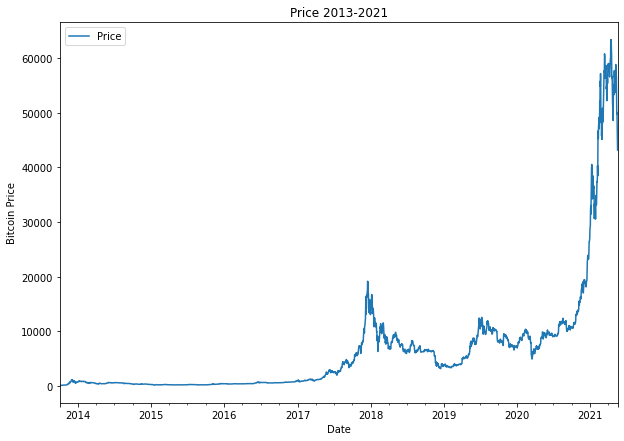

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("Bitcoin Price")
plt.title("Price 2013-2021")

#Import using python - csv

In [8]:
import csv
from datetime import datetime
timesteps = []

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))
timesteps[:5],btc_price[:5]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

Text(0.5, 1.0, 'Price 2013-2021')

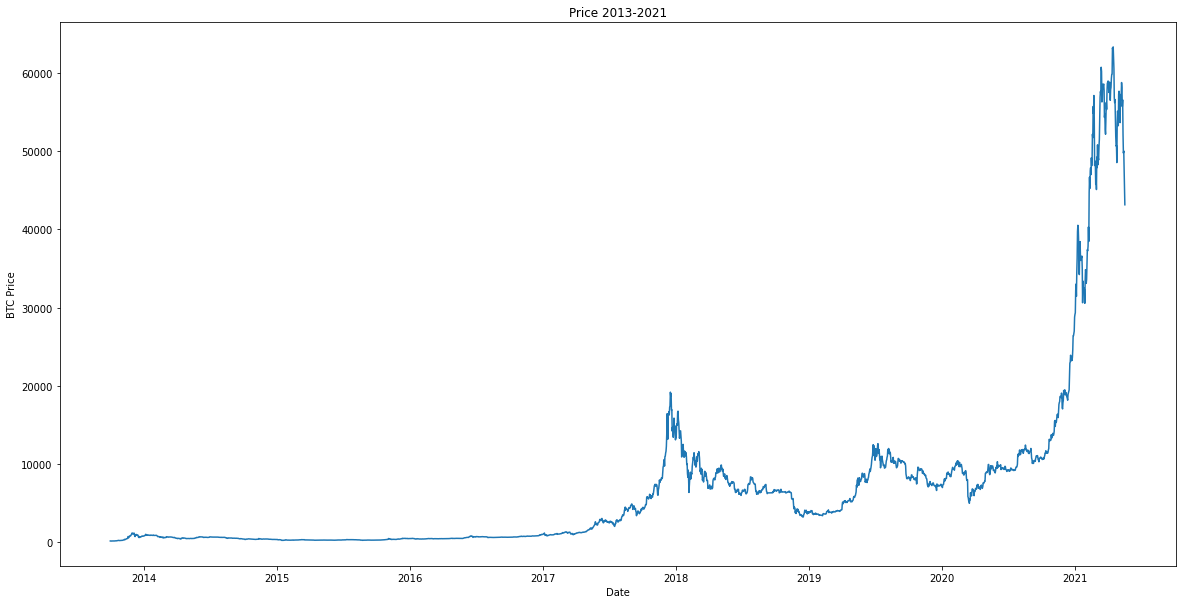

In [9]:
#Plot 
plt.figure(figsize=(20,10))
plt.plot(timesteps,btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price 2013-2021")

#Create train and test sets 
- Wrong way

In [10]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:5],prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [12]:
#Wrong way to train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(timesteps,prices,test_size=0.2,random_state=42)#Splits data randomly
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

Text(0, 0.5, 'BTC Price')

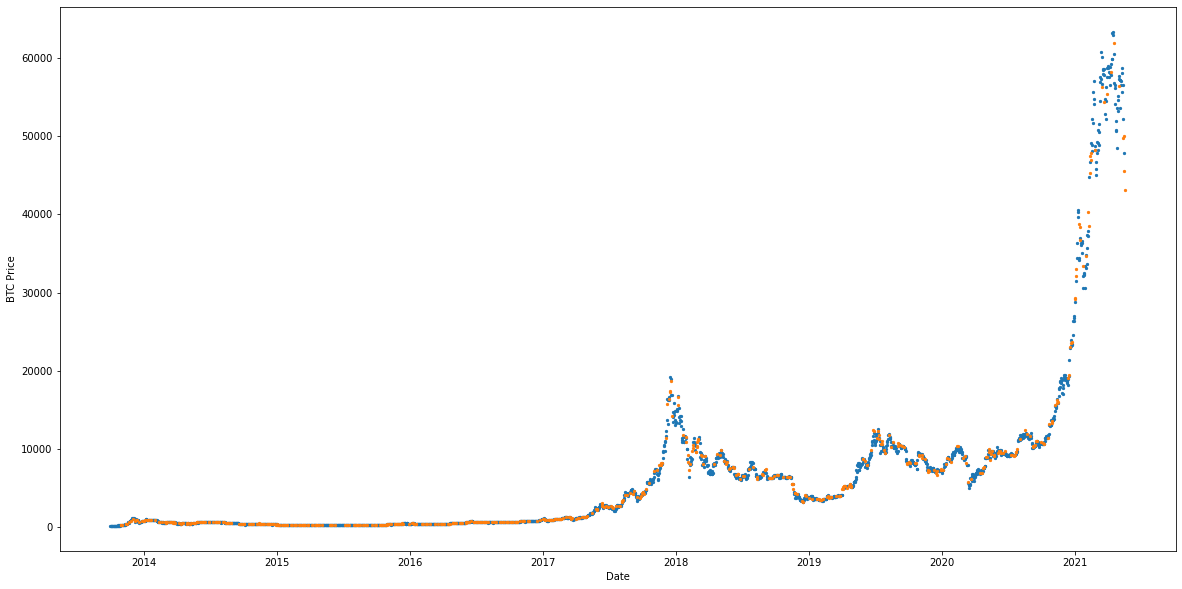

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [14]:
#Now in the rifght way
train_size = int(0.8*len(prices))
X_train,y_train = timesteps[:train_size],prices[:train_size]
X_test,y_test = timesteps[train_size:],prices[train_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

Text(0, 0.5, 'BTC Price')

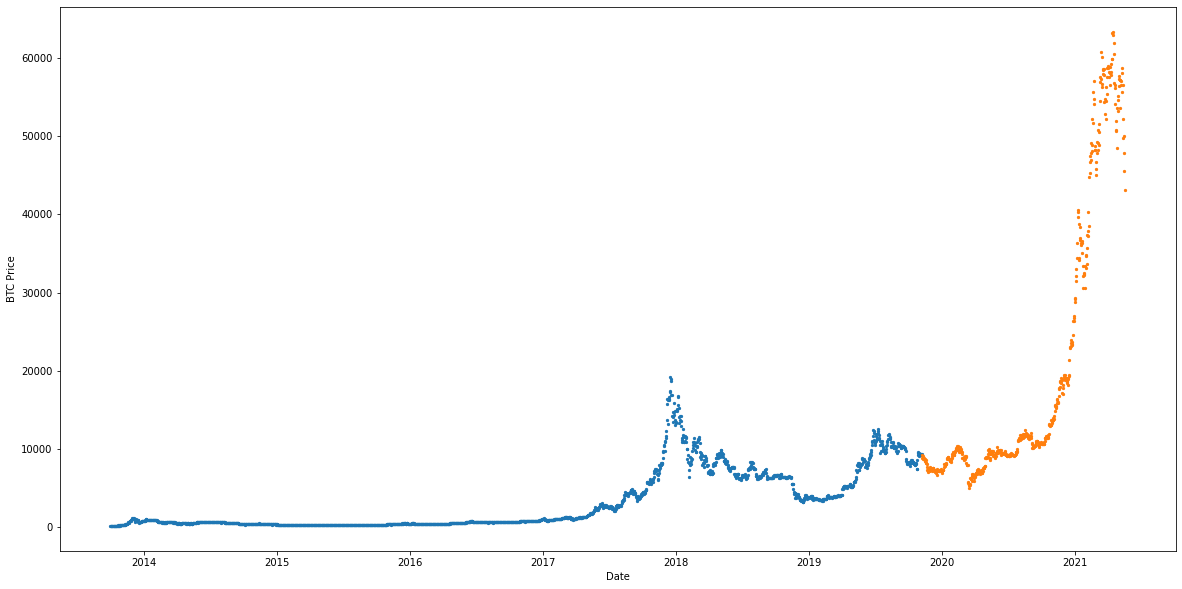

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [16]:
def plot_ts(timesteps,data,start=0,end=None,format=".",labels=None):
  plt.plot(timesteps[start:end],data[start:end],format,label=labels)
  plt.xlabel="Timesteps"
  plt.ylabel="BTC_Price"
  plt.grid(True)
  if labels:
    plt.legend()

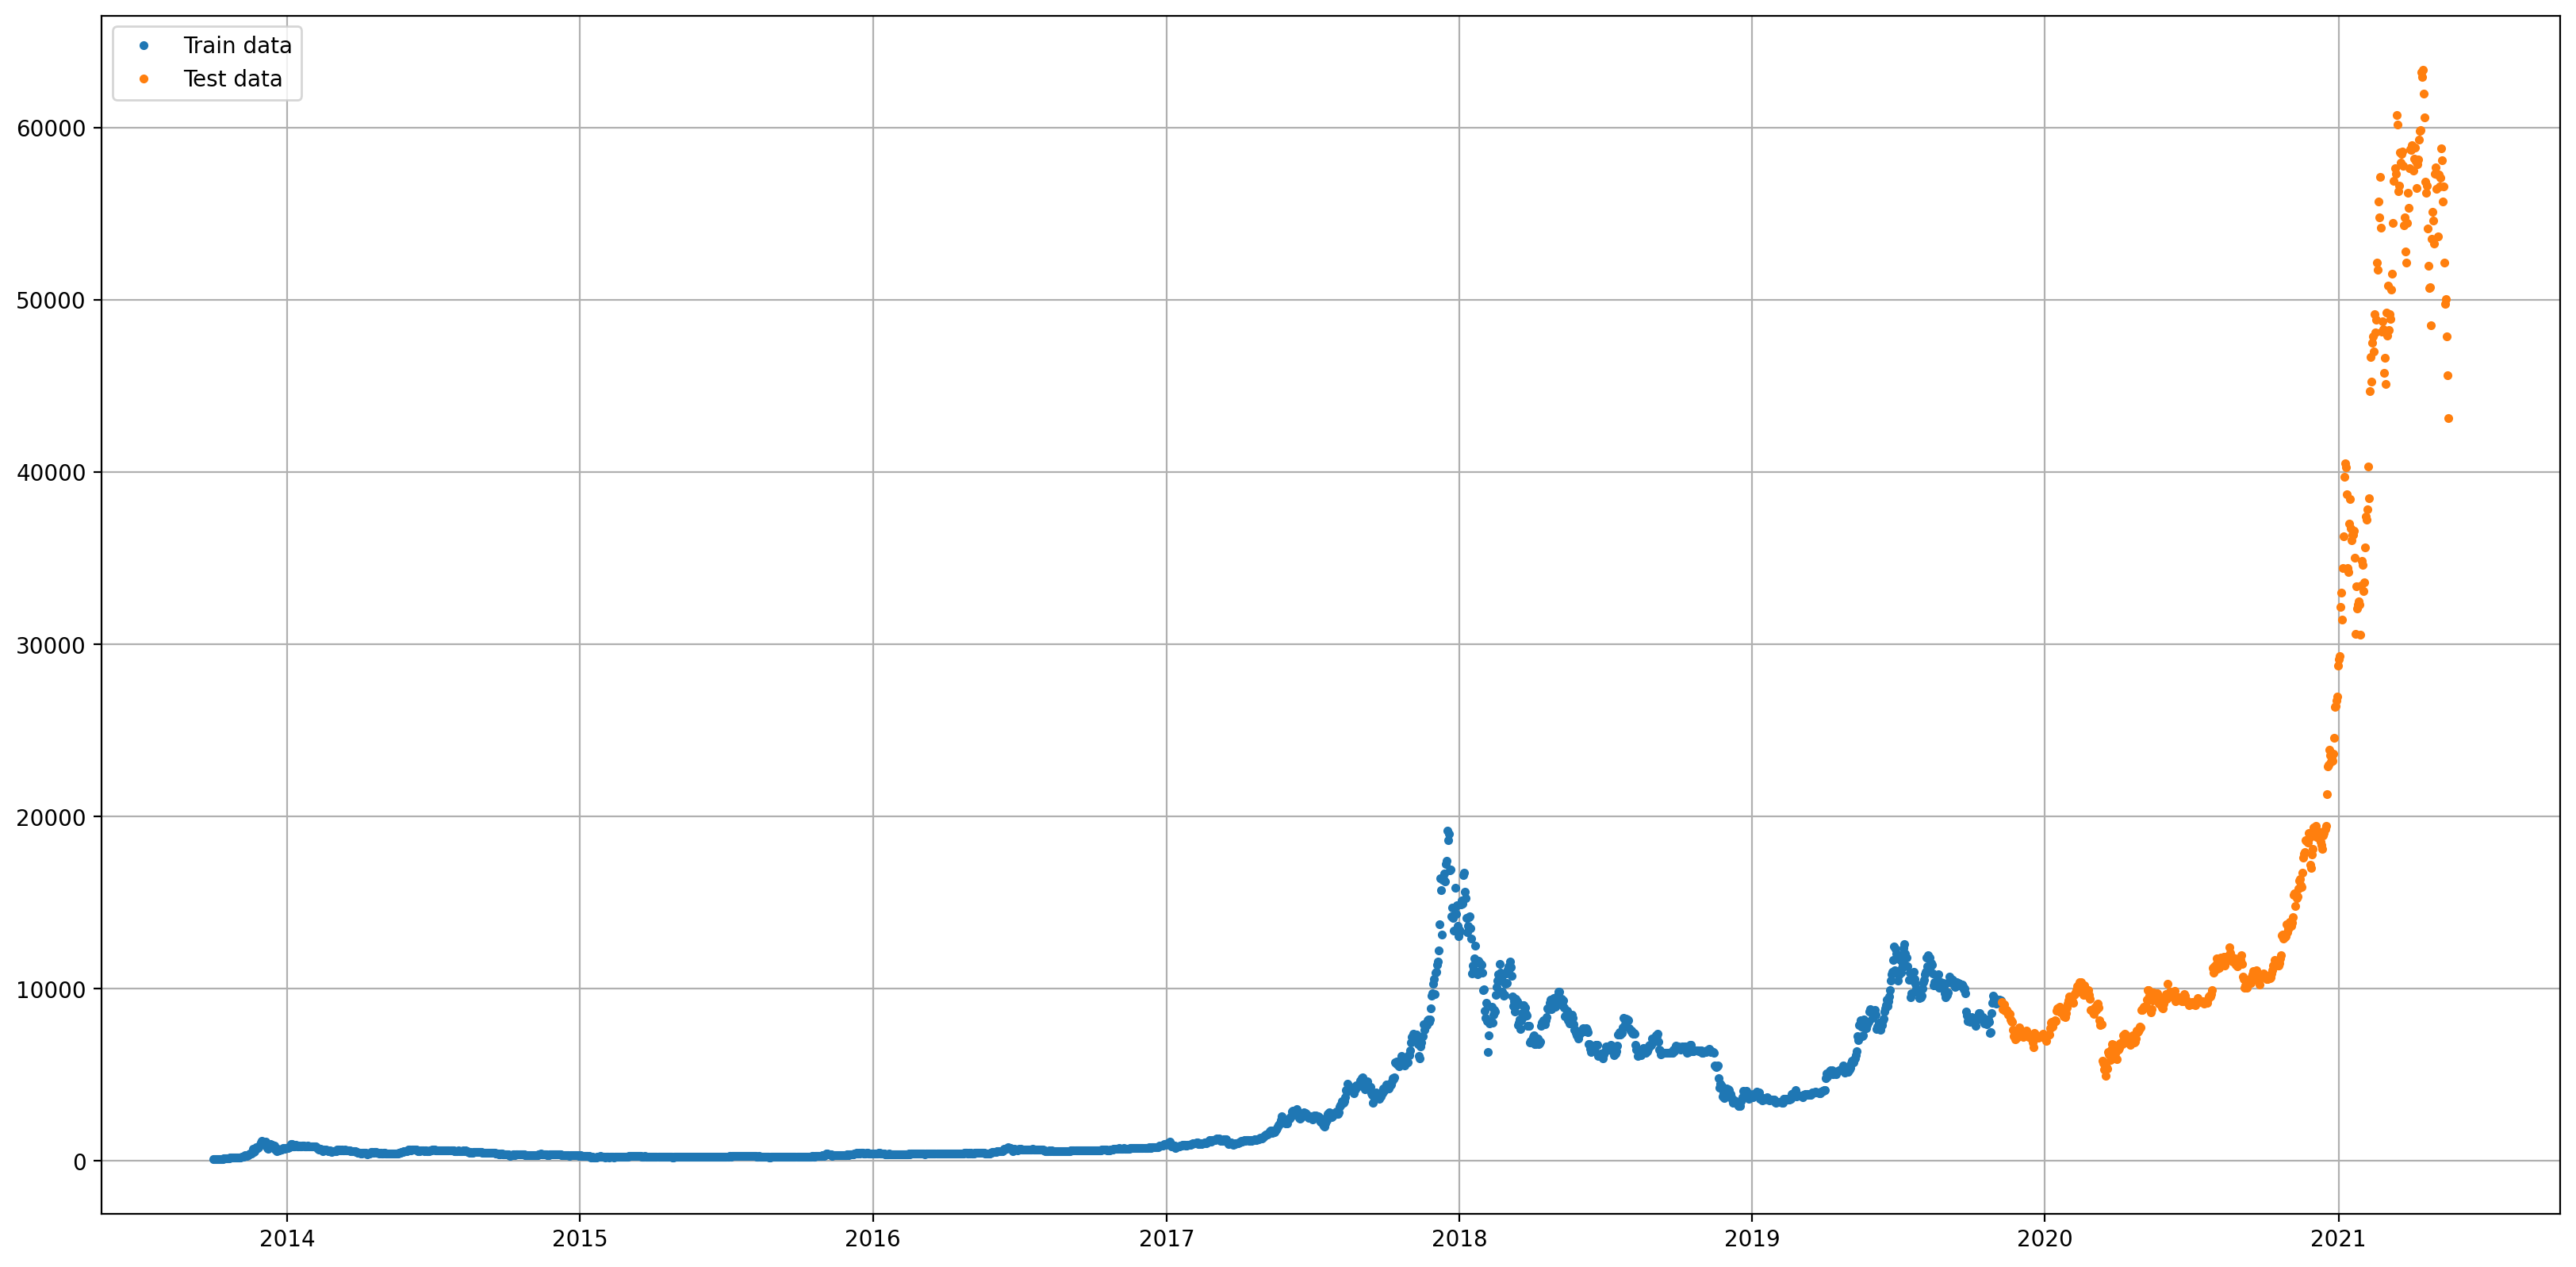

In [17]:
plt.figure(figsize=(20,10),dpi=200)
plot_ts(timesteps=X_train,data=y_train,labels="Train data")
plot_ts(timesteps=X_test,data=y_test,labels="Test data")

## Modeling Experiments

1. Naive model (baseline)
2. Dense model, horizon =1 window=7
3. Same as model_1 but with another window = 30, horizon = 1
4. Same as model_1 but with another window = 30, horizon = 7
5. Conv1D
6. LSTM
7. Same as model 1 (but with multivariate data)
8. N-BEATS algorithm
9. Ensemble (multiple models stacked together)
10. Future prediction model
11. Same as model_1 but with turkey data introduced 

##Naive Model
- y(t) = y(t-1)
- autoregression

In [18]:
naive_forecast = y_test[:-1]
naive_forecast[:10] , y_test[:10]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]))

In [19]:
naive_forecast[-10:], y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

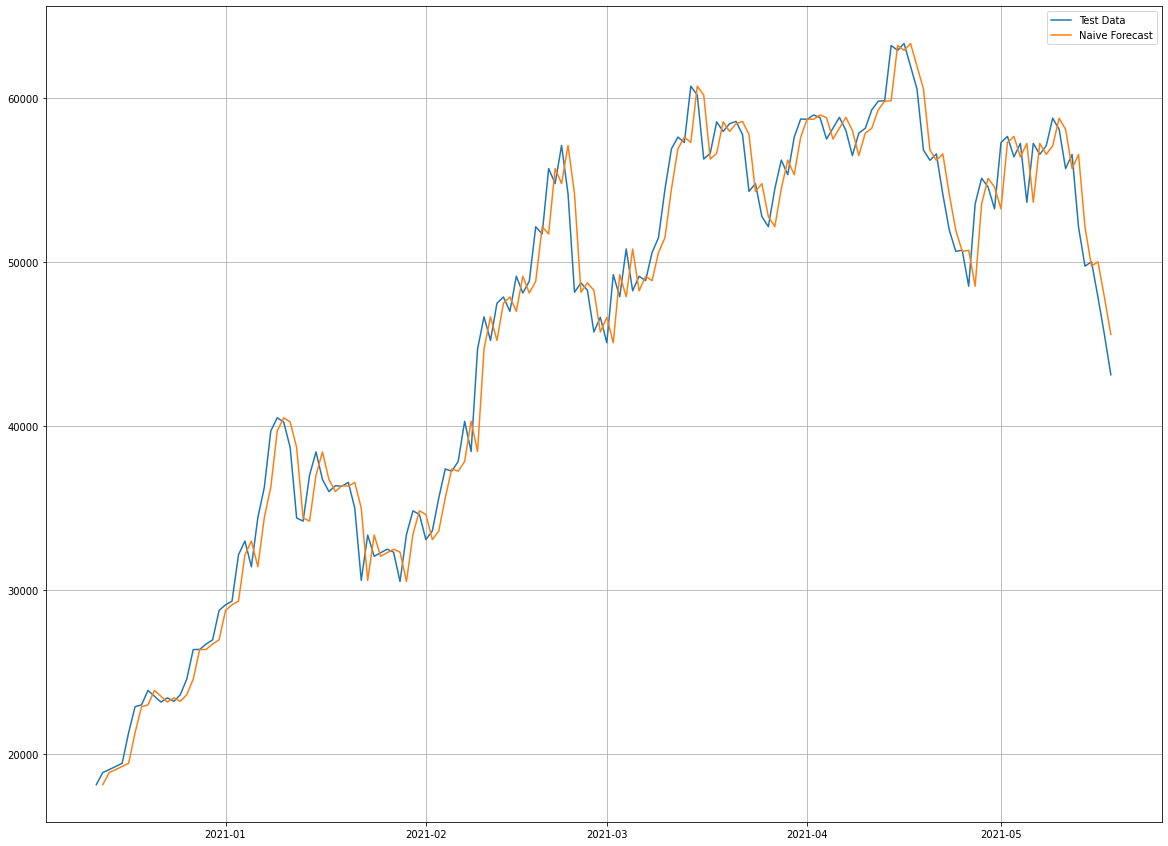

In [20]:
plt.figure(figsize=(20,15))
#plot_ts(X_train,y_train,labels="Train Data")
plot_ts(X_test,y_test,start=400,format='-',labels="Test Data")
plot_ts(X_test[1:], naive_forecast,start=400,format='-', labels="Naive Forecast")

##Time series evaluation metrics
- MAE / MSE / RMSE / Huber
- MAPE = Mean absolute precentage error
- MASE = Mean absolute scaled error

In [21]:
def mase(y_true,y_pred):
  """
  For non seasonality
  """
  import tensorflow as tf
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  #mae of naive forecast
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive


In [22]:
mase(y_true=y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [23]:
def error_dict(y_true,y_pred):
  """
  Collect MAE, MASE, RMSE, MSE, MAPE to dictionary
  """
  errors = {}
  import tensorflow as tf
  import numpy as np
  errors["MAE"] = tf.reduce_mean(tf.abs(y_true-y_pred)).numpy()
  errors["MSE"] = tf.reduce_mean((y_true-y_pred)**2).numpy()
  errors["RMSE"] = np.sqrt(tf.reduce_mean((y_true-y_pred)**2))
  errors["MASE"] = mase(y_true,y_pred).numpy()
  errors["MAPE"] = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred).numpy()
  if errors["MAPE"].ndim > 0:
    errors["MAE"]  = tf.reduce_mean(errors["MAE"]).numpy()
    errors["MSE"] = tf.reduce_mean(errors["MSE"]).numpy()
    errors["RMSE"] = tf.reduce_mean(errors["RMSE"]).numpy()
    errors["MASE"] = tf.reduce_mean(errors["MASE"]).numpy()
    errors["MAPE"] = tf.reduce_mean(errors["MAPE"]).numpy()
  return errors

In [24]:
naive_results = error_dict(y_true=y_test[1:], y_pred = naive_forecast)
naive_results

{'MAE': 567.9802273457541,
 'MSE': 1147547.1250238959,
 'RMSE': 1071.2362601330744,
 'MASE': 0.9995699939182624,
 'MAPE': 2.516524929982267}

##Make windows for deep learning models - make it supervised
[0,1,2,3,4,5,6] -> 7

[1,2,3,4,5,6,7] -> 8

In [25]:
HORIZON = 1
WINDOW_SIZE = 7
import tensorflow as tf
def get_labelled_window(data,horizon=HORIZON):
  """
  Getting np. Input [1,2,3,4,5,6,7] -> Output ([1,2,3,4,5,6], [7])
  """
  return data[:,:-horizon], data[:,-horizon:]

In [26]:
window, labels = get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
tf.squeeze(window),tf.squeeze(labels)

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=7>)

## Dwie opcje:
- Sliding window - Tutaj zostanie użyte
- Expanding window 

## Making windows manually

In [27]:
#Make preprocessing function
#Ręczne tworzenie okien - Aczkolwiek jest gotowa funkcja - tf.keras.preprocessing.timeseries_dataset_from_array
"""
1. Window of window size
2. Window indexes
3. Data to made in 2 window indexes
4. Make windows with their labels
"""
def get_windows(data,window_size = WINDOW_SIZE,horizon=HORIZON):
  #1.
  window_steps = np.expand_dims(np.arange(window_size+horizon),axis=0)
  #2.
  window_indexes = window_steps + np.expand_dims(np.arange(len(data)-window_size-horizon+1),axis=0).T
  #3.
  window_values = data[window_indexes]
  #4.
  windows,labels = get_labelled_window(window_values,horizon=horizon)
  return windows,labels

In [28]:
import numpy as np
np.expand_dims(np.arange(8), axis=0) + np.expand_dims(np.arange(20-7-1+1),axis=0).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19]])

In [29]:
windows, labels = get_windows(prices)

In [30]:
#First
for i in range(5):
  print(f"Input {windows[i]}  -> Output {labels[i]}")

Input [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -> Output [123.033]
Input [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]  -> Output [124.049]
Input [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]  -> Output [125.96116]
Input [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]  -> Output [125.27966]
Input [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966]  -> Output [125.9275]


In [31]:
#Last
for i in range(5):
  print(f"Input {windows[i-5]}  -> Output {labels[i-5]}")

Input [56583.84987917 57107.12067189 58788.20967893 58102.19142623
 55715.54665129 56573.5554719  52147.82118698]  -> Output [49764.1320816]
Input [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816 ]  -> Output [50032.69313676]
Input [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]  -> Output [47885.62525472]
Input [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]  -> Output [45604.61575361]
Input [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]  -> Output [43144.47129086]


## Making windows with built in function
- tf.keras.preprocessing.timeseries_dataset_from_array

In [32]:
tf.keras.preprocessing.timeseries_dataset_from_array(data=prices[:-1],targets=prices[1:],sequence_length=8,sequence_stride=1)

<BatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Make train/test split

In [33]:
def train_test_split(windows,labels,test_split):
  split = int(len(windows) * (1-test_split))
  train_windows = windows[:split]
  train_labels = labels[:split]
  test_windows = windows[split:]
  test_labels = labels[split:]
  return train_windows, train_labels,test_windows, test_labels

In [34]:
train_windows, train_labels,test_windows, test_labels = train_test_split(windows=windows,labels=labels,test_split=0.2)

In [35]:
len(train_windows), len(train_labels), len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [36]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ]])

In [37]:
train_labels[:3]

array([[123.033  ],
       [124.049  ],
       [125.96116]])

##Model checkpoints - Callbacks

In [38]:
import os
def checkpoint(model_name,path = "experiments"):
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(path,model_name),
                                                        verbose=1,
                                                        save_best_only=True)
  return model_checkpoint

##Model 2: Dense model

In [39]:
import tensorflow as tf
from tensorflow.keras import layers
model2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model2")

#Compile
model2.compile(loss="mse",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])
#Fit
model2.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[checkpoint(model2.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 3110467.7500 - mae: 902.6966 - mse: 3110467.7500     
Epoch 1: val_loss improved from inf to 21828308.00000, saving model to experiments/model2


18/18 [==============================] - 5s 47ms/step - loss: 3054945.7500 - mae: 890.8494 - mse: 3054945.7500 - val_loss: 21828308.0000 - val_mae: 3100.0339 - val_mse: 21828308.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1255856.6250 - mae: 602.6357 - mse: 1255856.6250
Epoch 2: val_loss improved from 21828308.00000 to 6312187.50000, saving model to experiments/model2


18/18 [==============================] - 1s 40ms/step - loss: 594169.6250 - mae: 387.1722 - mse: 594169.6250 - val_loss: 6312187.5000 - val_mae: 1562.0476 - val_mse: 6312187.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 158411.2031 - mae: 199.1289 - mse: 158411.2031
Epoch 3: val_loss improved from 6312187.50000 to 4133880.75000, saving model to experiments/model2


18/18 [==============================] - 0s 26ms/step - loss: 264078.0000 - mae: 242.9802 - mse: 264078.0000 - val_loss: 4133880.7500 - val_mae: 1108.7012 - val_mse: 4133880.7500
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 207898.7969 - mae: 204.2709 - mse: 207898.7969
Epoch 4: val_loss improved from 4133880.75000 to 4097683.25000, saving model to experiments/model2


18/18 [==============================] - 1s 40ms/step - loss: 210319.4062 - mae: 204.8421 - mse: 210319.4062 - val_loss: 4097683.2500 - val_mae: 1154.1616 - val_mse: 4097683.2500
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 200786.0156 - mae: 197.2684 - mse: 200786.0156
Epoch 5: val_loss improved from 4097683.25000 to 3696490.25000, saving model to experiments/model2


18/18 [==============================] - 1s 40ms/step - loss: 193909.7188 - mae: 193.9363 - mse: 193909.7188 - val_loss: 3696490.2500 - val_mae: 1060.5825 - val_mse: 3696490.2500
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 183868.0938 - mae: 187.5572 - mse: 183868.0938
Epoch 6: val_loss improved from 3696490.25000 to 3562327.50000, saving model to experiments/model2


18/18 [==============================] - 1s 32ms/step - loss: 185815.9375 - mae: 188.2832 - mse: 185815.9375 - val_loss: 3562327.5000 - val_mae: 1057.8682 - val_mse: 3562327.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 141266.4688 - mae: 170.4604 - mse: 141266.4688
Epoch 7: val_loss did not improve from 3562327.50000
18/18 [==============================] - 0s 5ms/step - loss: 176149.5312 - mae: 184.2317 - mse: 176149.5312 - val_loss: 3623987.5000 - val_mae: 1112.5566 - val_mse: 3623987.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 234277.2969 - mae: 185.5689 - mse: 234277.2969
Epoch 8: val_loss improved from 3562327.50000 to 3134985.00000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 163325.2500 - mae: 178.3766 - mse: 163325.2500 - val_loss: 3134985.0000 - val_mae: 964.6581 - val_mse: 3134985.0000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 89413.3750 - mae: 144.3531 - mse: 89413.3750
Epoch 9: val_loss did not improve from 3134985.00000
18/18 [==============================] - 0s 5ms/step - loss: 159427.9062 - mae: 180.6006 - mse: 159427.9062 - val_loss: 4218337.5000 - val_mae: 1272.6516 - val_mse: 4218337.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 94130.8516 - mae: 164.5615 - mse: 94130.8516
Epoch 10: val_loss improved from 3134985.00000 to 2880286.00000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 161588.3750 - mae: 178.1245 - mse: 161588.3750 - val_loss: 2880286.0000 - val_mae: 961.6656 - val_mse: 2880286.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 341117.1250 - mae: 193.9762 - mse: 341117.1250
Epoch 11: val_loss improved from 2880286.00000 to 2662765.00000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 147275.7344 - mae: 168.6387 - mse: 147275.7344 - val_loss: 2662765.0000 - val_mae: 901.2674 - val_mse: 2662765.0000
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 134327.4219 - mae: 160.0680 - mse: 134327.4219
Epoch 12: val_loss did not improve from 2662765.00000
18/18 [==============================] - 0s 5ms/step - loss: 134327.4219 - mae: 160.0680 - mse: 134327.4219 - val_loss: 2869566.0000 - val_mae: 1002.2766 - val_mse: 2869566.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 337040.1250 - mae: 219.3016 - mse: 337040.1250
Epoch 13: val_loss improved from 2662765.00000 to 2384559.50000, saving model to experiments/model2


18/18 [==============================] - 0s 29ms/step - loss: 129517.4062 - mae: 157.4249 - mse: 129517.4062 - val_loss: 2384559.5000 - val_mae: 848.2586 - val_mse: 2384559.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 182553.6562 - mae: 210.5482 - mse: 182553.6562
Epoch 14: val_loss improved from 2384559.50000 to 2305356.50000, saving model to experiments/model2


18/18 [==============================] - 0s 27ms/step - loss: 123269.9453 - mae: 154.1829 - mse: 123269.9453 - val_loss: 2305356.5000 - val_mae: 863.2510 - val_mse: 2305356.5000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 115744.3906 - mae: 136.8957 - mse: 115744.3906
Epoch 15: val_loss improved from 2305356.50000 to 2197567.00000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 118345.3828 - mae: 147.7394 - mse: 118345.3828 - val_loss: 2197567.0000 - val_mae: 811.2761 - val_mse: 2197567.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 73245.5156 - mae: 140.6084 - mse: 73245.5156
Epoch 16: val_loss did not improve from 2197567.00000
18/18 [==============================] - 0s 5ms/step - loss: 112961.7891 - mae: 145.5782 - mse: 112961.7891 - val_loss: 2412392.5000 - val_mae: 922.6427 - val_mse: 2412392.5000
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 110846.1094 - mae: 145.1042 - mse: 110846.1094
Epoch 17: val_loss improved from 2197567.00000 to 1976972.87500, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 110953.4688 - mae: 145.5154 - mse: 110953.4688 - val_loss: 1976972.8750 - val_mae: 788.7715 - val_mse: 1976972.8750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 87055.6094 - mae: 136.4459 - mse: 87055.6094
Epoch 18: val_loss improved from 1976972.87500 to 1913620.25000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 108608.0859 - mae: 141.6316 - mse: 108608.0859 - val_loss: 1913620.2500 - val_mae: 777.3716 - val_mse: 1913620.2500
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 75732.6250 - mae: 134.9873 - mse: 75732.6250
Epoch 19: val_loss did not improve from 1913620.25000
18/18 [==============================] - 0s 6ms/step - loss: 106076.8125 - mae: 141.3323 - mse: 106076.8125 - val_loss: 1924156.7500 - val_mae: 793.1223 - val_mse: 1924156.7500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 88570.3203 - mae: 148.7490 - mse: 88570.3203
Epoch 20: val_loss improved from 1913620.25000 to 1786436.37500, saving model to experiments/model2


18/18 [==============================] - 1s 31ms/step - loss: 101968.7109 - mae: 135.9872 - mse: 101968.7109 - val_loss: 1786436.3750 - val_mae: 748.5795 - val_mse: 1786436.3750
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 46695.7227 - mae: 98.3708 - mse: 46695.7227
Epoch 21: val_loss did not improve from 1786436.37500
18/18 [==============================] - 0s 6ms/step - loss: 97065.3047 - mae: 131.0721 - mse: 97065.3047 - val_loss: 1815655.1250 - val_mae: 770.2687 - val_mse: 1815655.1250
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 81591.0938 - mae: 118.0959 - mse: 81591.0938
Epoch 22: val_loss improved from 1786436.37500 to 1691128.12500, saving model to experiments/model2


18/18 [==============================] - 1s 29ms/step - loss: 95738.4375 - mae: 131.0378 - mse: 95738.4375 - val_loss: 1691128.1250 - val_mae: 726.9769 - val_mse: 1691128.1250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 85302.3125 - mae: 119.6475 - mse: 85302.3125
Epoch 23: val_loss improved from 1691128.12500 to 1637087.37500, saving model to experiments/model2


18/18 [==============================] - 0s 29ms/step - loss: 95140.3438 - mae: 132.4069 - mse: 95140.3438 - val_loss: 1637087.3750 - val_mae: 709.1754 - val_mse: 1637087.3750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 57230.7109 - mae: 105.6211 - mse: 57230.7109
Epoch 24: val_loss improved from 1637087.37500 to 1587233.25000, saving model to experiments/model2


18/18 [==============================] - 0s 29ms/step - loss: 91389.5469 - mae: 127.0781 - mse: 91389.5469 - val_loss: 1587233.2500 - val_mae: 689.7127 - val_mse: 1587233.2500
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 89985.8359 - mae: 125.2005 - mse: 89985.8359  
Epoch 25: val_loss improved from 1587233.25000 to 1556138.37500, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 89985.8359 - mae: 125.2005 - mse: 89985.8359 - val_loss: 1556138.3750 - val_mae: 682.9177 - val_mse: 1556138.3750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 72028.2422 - mae: 107.4134 - mse: 72028.2422
Epoch 26: val_loss did not improve from 1556138.37500
18/18 [==============================] - 0s 5ms/step - loss: 90163.3594 - mae: 129.3664 - mse: 90163.3594 - val_loss: 1563786.6250 - val_mae: 680.1987 - val_mse: 1563786.6250
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 88384.3125 - mae: 126.7235 - mse: 88384.3125
Epoch 27: val_loss improved from 1556138.37500 to 1498382.87500, saving model to experiments/model2


18/18 [==============================] - 1s 46ms/step - loss: 89575.3750 - mae: 127.4714 - mse: 89575.3750 - val_loss: 1498382.8750 - val_mae: 667.7695 - val_mse: 1498382.8750
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 86222.1875 - mae: 122.5854 - mse: 86222.1875
Epoch 28: val_loss did not improve from 1498382.87500
18/18 [==============================] - 0s 6ms/step - loss: 86222.1875 - mae: 122.5854 - mse: 86222.1875 - val_loss: 1670942.7500 - val_mae: 743.9714 - val_mse: 1670942.7500
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 94101.8594 - mae: 131.7427 - mse: 94101.8594
Epoch 29: val_loss did not improve from 1498382.87500
18/18 [==============================] - 0s 6ms/step - loss: 92572.4219 - mae: 130.8552 - mse: 92572.4219 - val_loss: 1633597.7500 - val_mae: 731.8372 - val_mse: 1633597.7500
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 86286.5625 - mae: 122.3504 - mse: 86286.5625
Epoch 30: val_loss im

18/18 [==============================] - 1s 30ms/step - loss: 87608.7812 - mae: 123.8096 - mse: 87608.7812 - val_loss: 1468867.2500 - val_mae: 655.8343 - val_mse: 1468867.2500
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 97956.7891 - mae: 131.3713 - mse: 97956.7891
Epoch 31: val_loss improved from 1468867.25000 to 1455976.62500, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 84295.3516 - mae: 121.3388 - mse: 84295.3516 - val_loss: 1455976.6250 - val_mae: 652.6807 - val_mse: 1455976.6250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 50521.7383 - mae: 97.0730 - mse: 50521.7383
Epoch 32: val_loss improved from 1455976.62500 to 1437337.87500, saving model to experiments/model2


18/18 [==============================] - 1s 30ms/step - loss: 84478.9922 - mae: 122.0140 - mse: 84478.9922 - val_loss: 1437337.8750 - val_mae: 647.9556 - val_mse: 1437337.8750
Epoch 33/100
14/18 [======================>.......] - ETA: 0s - loss: 85515.7891 - mae: 124.1486 - mse: 85515.7891
Epoch 33: val_loss did not improve from 1437337.87500
18/18 [==============================] - 0s 8ms/step - loss: 85248.4141 - mae: 124.3910 - mse: 85248.4141 - val_loss: 1450620.3750 - val_mae: 653.1186 - val_mse: 1450620.3750
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 71528.8281 - mae: 114.0877 - mse: 71528.8281  
Epoch 34: val_loss improved from 1437337.87500 to 1379449.75000, saving model to experiments/model2


18/18 [==============================] - 1s 41ms/step - loss: 81725.8672 - mae: 119.8882 - mse: 81725.8672 - val_loss: 1379449.7500 - val_mae: 634.3522 - val_mse: 1379449.7500
Epoch 35/100
13/18 [====================>.........] - ETA: 0s - loss: 90388.1172 - mae: 126.0210 - mse: 90388.1172
Epoch 35: val_loss did not improve from 1379449.75000
18/18 [==============================] - 0s 7ms/step - loss: 84023.1484 - mae: 122.6784 - mse: 84023.1484 - val_loss: 1429731.8750 - val_mae: 648.7264 - val_mse: 1429731.8750
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 77561.4375 - mae: 120.4637 - mse: 77561.4375
Epoch 36: val_loss improved from 1379449.75000 to 1364260.87500, saving model to experiments/model2


18/18 [==============================] - 1s 37ms/step - loss: 80932.8125 - mae: 120.4302 - mse: 80932.8125 - val_loss: 1364260.8750 - val_mae: 631.3017 - val_mse: 1364260.8750
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 96407.7266 - mae: 128.4341 - mse: 96407.7266
Epoch 37: val_loss improved from 1364260.87500 to 1363566.25000, saving model to experiments/model2


18/18 [==============================] - 0s 29ms/step - loss: 80241.8672 - mae: 117.4627 - mse: 80241.8672 - val_loss: 1363566.2500 - val_mae: 628.3515 - val_mse: 1363566.2500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 67487.6797 - mae: 110.4496 - mse: 67487.6797
Epoch 38: val_loss did not improve from 1363566.25000
18/18 [==============================] - 0s 5ms/step - loss: 82211.5625 - mae: 119.8381 - mse: 82211.5625 - val_loss: 1502384.6250 - val_mae: 694.7269 - val_mse: 1502384.6250
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 118982.7812 - mae: 170.9326 - mse: 118982.7812
Epoch 39: val_loss improved from 1363566.25000 to 1330218.50000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 84486.5156 - mae: 125.7674 - mse: 84486.5156 - val_loss: 1330218.5000 - val_mae: 619.1627 - val_mse: 1330218.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 147087.4688 - mae: 119.7866 - mse: 147087.4688
Epoch 40: val_loss did not improve from 1330218.50000
18/18 [==============================] - 0s 6ms/step - loss: 80151.3672 - mae: 119.5171 - mse: 80151.3672 - val_loss: 1584920.6250 - val_mae: 704.1581 - val_mse: 1584920.6250
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 141530.1875 - mae: 137.7813 - mse: 141530.1875
Epoch 41: val_loss did not improve from 1330218.50000
18/18 [==============================] - 0s 5ms/step - loss: 81495.2812 - mae: 124.5970 - mse: 81495.2812 - val_loss: 1499105.8750 - val_mae: 676.7139 - val_mse: 1499105.8750
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 32929.3320 - mae: 92.4798 - mse: 32929.3320
Epoch 42: val_loss

18/18 [==============================] - 0s 29ms/step - loss: 79483.6641 - mae: 117.2182 - mse: 79483.6641 - val_loss: 1322092.0000 - val_mae: 620.2883 - val_mse: 1322092.0000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 60303.6016 - mae: 114.3580 - mse: 60303.6016
Epoch 44: val_loss did not improve from 1322092.00000
18/18 [==============================] - 0s 6ms/step - loss: 80786.4297 - mae: 117.4154 - mse: 80786.4297 - val_loss: 1323912.6250 - val_mae: 618.3341 - val_mse: 1323912.6250
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 81581.5391 - mae: 119.4227 - mse: 81581.5391
Epoch 45: val_loss did not improve from 1322092.00000
18/18 [==============================] - 0s 6ms/step - loss: 78956.7031 - mae: 118.4538 - mse: 78956.7031 - val_loss: 1363895.2500 - val_mae: 642.5239 - val_mse: 1363895.2500
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 85240.4219 - mae: 128.9802 - mse: 85240.4219
Epoch 46: val_loss di

18/18 [==============================] - 0s 28ms/step - loss: 84126.5703 - mae: 124.3037 - mse: 84126.5703 - val_loss: 1311382.3750 - val_mae: 615.1444 - val_mse: 1311382.3750
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 25748.3320 - mae: 68.1473 - mse: 25748.3320
Epoch 48: val_loss improved from 1311382.37500 to 1285571.62500, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 78369.7266 - mae: 115.5642 - mse: 78369.7266 - val_loss: 1285571.6250 - val_mae: 607.3649 - val_mse: 1285571.6250
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 78988.8984 - mae: 118.8973 - mse: 78988.8984
Epoch 49: val_loss did not improve from 1285571.62500
18/18 [==============================] - 0s 6ms/step - loss: 78988.8984 - mae: 118.8973 - mse: 78988.8984 - val_loss: 1878681.1250 - val_mae: 829.3029 - val_mse: 1878681.1250
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 76154.4531 - mae: 137.5416 - mse: 76154.4531
Epoch 50: val_loss did not improve from 1285571.62500
18/18 [==============================] - 0s 5ms/step - loss: 78307.0625 - mae: 117.4526 - mse: 78307.0625 - val_loss: 1310445.5000 - val_mae: 621.9225 - val_mse: 1310445.5000
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 140060.2031 - mae: 150.3127 - mse: 140060.2031
Epoch 51: val_loss 

18/18 [==============================] - 0s 29ms/step - loss: 80363.3203 - mae: 117.4232 - mse: 80363.3203 - val_loss: 1253943.5000 - val_mae: 599.4656 - val_mse: 1253943.5000
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 41467.2383 - mae: 90.6872 - mse: 41467.2383
Epoch 56: val_loss did not improve from 1253943.50000
18/18 [==============================] - 0s 5ms/step - loss: 75646.8906 - mae: 114.5398 - mse: 75646.8906 - val_loss: 1378241.8750 - val_mae: 656.9462 - val_mse: 1378241.8750
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 114027.6719 - mae: 137.0400 - mse: 114027.6719
Epoch 57: val_loss did not improve from 1253943.50000
18/18 [==============================] - 0s 5ms/step - loss: 75922.7422 - mae: 115.0018 - mse: 75922.7422 - val_loss: 1426432.8750 - val_mae: 662.7750 - val_mse: 1426432.8750
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 37208.4492 - mae: 98.3141 - mse: 37208.4492
Epoch 58: val_loss di

18/18 [==============================] - 0s 29ms/step - loss: 85277.0078 - mae: 129.3341 - mse: 85277.0078 - val_loss: 1239451.6250 - val_mae: 596.5978 - val_mse: 1239451.6250
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 73246.6172 - mae: 112.5453 - mse: 73246.6172
Epoch 69: val_loss did not improve from 1239451.62500
18/18 [==============================] - 0s 6ms/step - loss: 73246.6172 - mae: 112.5453 - mse: 73246.6172 - val_loss: 1378235.5000 - val_mae: 647.9451 - val_mse: 1378235.5000
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 69992.9609 - mae: 115.6515 - mse: 69992.9609  
Epoch 70: val_loss did not improve from 1239451.62500
18/18 [==============================] - 0s 6ms/step - loss: 77815.6406 - mae: 117.9297 - mse: 77815.6406 - val_loss: 1632173.1250 - val_mae: 758.0681 - val_mse: 1632173.1250
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 55060.8203 - mae: 120.6173 - mse: 55060.8203
Epoch 71: val_loss 

18/18 [==============================] - 0s 28ms/step - loss: 74792.9375 - mae: 114.5867 - mse: 74792.9375 - val_loss: 1218360.3750 - val_mae: 586.1666 - val_mse: 1218360.3750
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 87057.0781 - mae: 101.4712 - mse: 87057.0781
Epoch 73: val_loss improved from 1218360.37500 to 1214979.00000, saving model to experiments/model2


18/18 [==============================] - 1s 44ms/step - loss: 76281.0938 - mae: 116.4170 - mse: 76281.0938 - val_loss: 1214979.0000 - val_mae: 585.1884 - val_mse: 1214979.0000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 74159.1953 - mae: 111.0895 - mse: 74159.1953
Epoch 74: val_loss improved from 1214979.00000 to 1210265.87500, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 75481.9141 - mae: 114.6564 - mse: 75481.9141 - val_loss: 1210265.8750 - val_mae: 584.0859 - val_mse: 1210265.8750
Epoch 75/100
16/18 [=========================>....] - ETA: 0s - loss: 76351.7500 - mae: 115.0954 - mse: 76351.7500
Epoch 75: val_loss did not improve from 1210265.87500
18/18 [==============================] - 0s 6ms/step - loss: 73596.6562 - mae: 113.1237 - mse: 73596.6562 - val_loss: 1280167.5000 - val_mae: 621.7238 - val_mse: 1280167.5000
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 66811.8281 - mae: 125.5085 - mse: 66811.8281
Epoch 76: val_loss did not improve from 1210265.87500
18/18 [==============================] - 0s 5ms/step - loss: 71895.9375 - mae: 111.6424 - mse: 71895.9375 - val_loss: 1212445.8750 - val_mae: 584.1830 - val_mse: 1212445.8750
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 135740.6406 - mae: 132.3260 - mse: 135740.6406
Epoch 77: val_loss 

18/18 [==============================] - 1s 30ms/step - loss: 75714.5312 - mae: 120.2341 - mse: 75714.5312 - val_loss: 1190017.3750 - val_mae: 576.9616 - val_mse: 1190017.3750
Epoch 86/100
15/18 [========================>.....] - ETA: 0s - loss: 75317.6406 - mae: 112.4013 - mse: 75317.6406
Epoch 86: val_loss did not improve from 1190017.37500
18/18 [==============================] - 0s 7ms/step - loss: 71591.4219 - mae: 110.4209 - mse: 71591.4219 - val_loss: 1325823.1250 - val_mae: 646.7166 - val_mse: 1325823.1250
Epoch 87/100
14/18 [======================>.......] - ETA: 0s - loss: 75570.9844 - mae: 115.8668 - mse: 75570.9844
Epoch 87: val_loss did not improve from 1190017.37500
18/18 [==============================] - 0s 7ms/step - loss: 73562.3438 - mae: 114.3973 - mse: 73562.3438 - val_loss: 1335631.3750 - val_mae: 638.2614 - val_mse: 1335631.3750
Epoch 88/100
16/18 [=========================>....] - ETA: 0s - loss: 74631.5078 - mae: 112.0170 - mse: 74631.5078  
Epoch 88: val_loss 

18/18 [==============================] - 1s 41ms/step - loss: 70313.5000 - mae: 109.3217 - mse: 70313.5000 - val_loss: 1180569.6250 - val_mae: 573.3281 - val_mse: 1180569.5000
Epoch 93/100
14/18 [======================>.......] - ETA: 0s - loss: 76600.5859 - mae: 114.3680 - mse: 76600.5859
Epoch 93: val_loss improved from 1180569.62500 to 1177638.50000, saving model to experiments/model2


18/18 [==============================] - 0s 28ms/step - loss: 69638.7891 - mae: 109.0821 - mse: 69638.7891 - val_loss: 1177638.5000 - val_mae: 572.3258 - val_mse: 1177638.5000
Epoch 94/100
17/18 [===========================>..] - ETA: 0s - loss: 72473.6875 - mae: 111.6014 - mse: 72473.6875
Epoch 94: val_loss did not improve from 1177638.50000
18/18 [==============================] - 0s 6ms/step - loss: 71857.9531 - mae: 111.5275 - mse: 71857.9531 - val_loss: 1269435.8750 - val_mae: 614.5119 - val_mse: 1269435.8750
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 20898.3496 - mae: 71.0846 - mse: 20898.3496
Epoch 95: val_loss did not improve from 1177638.50000
18/18 [==============================] - 0s 5ms/step - loss: 73840.1641 - mae: 114.0344 - mse: 73840.1641 - val_loss: 1377891.8750 - val_mae: 670.5955 - val_mse: 1377891.8750
Epoch 96/100
 1/18 [>.............................] - ETA: 0s - loss: 43021.0156 - mae: 104.8669 - mse: 43021.0156
Epoch 96: val_loss did

18/18 [==============================] - 0s 29ms/step - loss: 73377.5156 - mae: 114.4191 - mse: 73377.5156 - val_loss: 1171821.8750 - val_mae: 570.2650 - val_mse: 1171821.8750
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 82612.5156 - mae: 112.1204 - mse: 82612.5156
Epoch 99: val_loss did not improve from 1171821.87500
18/18 [==============================] - 0s 5ms/step - loss: 76158.3672 - mae: 118.5157 - mse: 76158.3672 - val_loss: 1639649.5000 - val_mae: 743.4666 - val_mse: 1639649.5000
Epoch 100/100
 1/18 [>.............................] - ETA: 0s - loss: 100467.8750 - mae: 155.8705 - mse: 100467.8750
Epoch 100: val_loss did not improve from 1171821.87500
18/18 [==============================] - 0s 5ms/step - loss: 74143.6562 - mae: 114.9250 - mse: 74143.6562 - val_loss: 1198148.0000 - val_mae: 583.4244 - val_mse: 1198148.0000


In [40]:
model2_best = tf.keras.models.load_model("/content/experiments/model2")
model2_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1171821.8750 - mae: 570.2648 - mse: 1171821.8750


[1171821.875, 570.2648315429688, 1171821.875]

In [41]:
model2_predictions = np.squeeze(model2_best.predict(test_windows))

18/18 [==============================] - 0s 1ms/step


In [42]:
model2_results = error_dict(np.squeeze(test_labels),model2_predictions)
model2_results, naive_results

({'MAE': 570.2648479847988,
  'MSE': 1171821.8362782402,
  'RMSE': 1082.5071991807908,
  'MASE': 1.0017972844216159,
  'MAPE': 2.5701246},
 {'MAE': 567.9802273457541,
  'MSE': 1147547.1250238959,
  'RMSE': 1071.2362601330744,
  'MASE': 0.9995699939182624,
  'MAPE': 2.516524929982267})

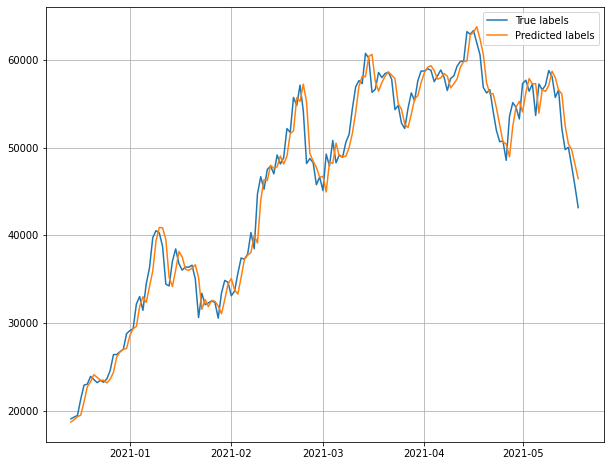

In [43]:
#Plot
plt.figure(figsize=(10,8))
plot_ts(X_test[-len(test_windows):],tf.squeeze(test_labels),start=400,format='-',labels="True labels")
plot_ts(X_test[-len(test_windows):],model2_predictions,start=400,format="-",labels="Predicted labels")

## Model 3: Dense - w30 h1

In [44]:
windows3, labels3 = get_windows(prices,window_size=30,horizon=1)

In [45]:
windows3[:3], labels3[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [46]:
#Split data
train_windows3, train_labels3,test_windows3, test_labels3 = train_test_split(windows3,labels3,0.2)

In [47]:
model3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(1)
],name="model3")

#Compile
model3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])
#Fit
model3.fit(x=train_windows3,
           y=train_labels3,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows3,test_labels3),
           callbacks=[checkpoint(model3.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 636.9995 - mae: 636.9995 - mse: 1656428.6250   
Epoch 1: val_loss improved from inf to 3100.54126, saving model to experiments/model3


18/18 [==============================] - 1s 36ms/step - loss: 615.5394 - mae: 615.5394 - mse: 1571370.8750 - val_loss: 3100.5413 - val_mae: 3100.5413 - val_mse: 22634744.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 377.4294 - mae: 377.4294 - mse: 577031.8750
Epoch 2: val_loss improved from 3100.54126 to 1648.49158, saving model to experiments/model3


18/18 [==============================] - 1s 30ms/step - loss: 375.5619 - mae: 375.5619 - mse: 571801.6875 - val_loss: 1648.4916 - val_mae: 1648.4916 - val_mse: 8032364.5000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 283.5552 - mae: 283.5552 - mse: 375403.0000
Epoch 3: val_loss improved from 1648.49158 to 1422.56763, saving model to experiments/model3


18/18 [==============================] - 0s 29ms/step - loss: 283.8798 - mae: 283.8798 - mse: 375375.4062 - val_loss: 1422.5676 - val_mae: 1422.5676 - val_mse: 6079832.0000
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 243.9328 - mae: 243.9328 - mse: 292080.8438
Epoch 4: val_loss did not improve from 1422.56763
18/18 [==============================] - 0s 6ms/step - loss: 244.2732 - mae: 244.2732 - mse: 285819.7188 - val_loss: 1488.4336 - val_mae: 1488.4336 - val_mse: 6000438.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 215.0114 - mae: 215.0114 - mse: 178786.7188
Epoch 5: val_loss improved from 1422.56763 to 1119.42151, saving model to experiments/model3


18/18 [==============================] - 0s 29ms/step - loss: 218.9266 - mae: 218.9266 - mse: 233496.0156 - val_loss: 1119.4215 - val_mae: 1119.4215 - val_mse: 3912493.5000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 191.2307 - mae: 191.2307 - mse: 188532.6406
Epoch 6: val_loss improved from 1119.42151 to 1043.21118, saving model to experiments/model3


18/18 [==============================] - 1s 31ms/step - loss: 191.3785 - mae: 191.3785 - mse: 187618.7656 - val_loss: 1043.2112 - val_mae: 1043.2112 - val_mse: 3375835.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 229.5553 - mae: 229.5553 - mse: 225235.5625
Epoch 7: val_loss improved from 1043.21118 to 998.61505, saving model to experiments/model3


18/18 [==============================] - 1s 44ms/step - loss: 178.3574 - mae: 178.3574 - mse: 160290.7812 - val_loss: 998.6151 - val_mae: 998.6151 - val_mse: 3016081.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 159.2186 - mae: 159.2186 - mse: 123927.6641
Epoch 8: val_loss improved from 998.61505 to 896.79645, saving model to experiments/model3


18/18 [==============================] - 0s 29ms/step - loss: 173.2100 - mae: 173.2100 - mse: 152061.5625 - val_loss: 896.7964 - val_mae: 896.7964 - val_mse: 2515011.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 158.2567 - mae: 158.2567 - mse: 119472.9453
Epoch 9: val_loss did not improve from 896.79645
18/18 [==============================] - 0s 5ms/step - loss: 166.7786 - mae: 166.7786 - mse: 139217.6875 - val_loss: 913.6848 - val_mae: 913.6848 - val_mse: 2836318.2500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 129.1054 - mae: 129.1054 - mse: 93839.3516
Epoch 10: val_loss improved from 896.79645 to 846.55267, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 161.7540 - mae: 161.7540 - mse: 129274.9922 - val_loss: 846.5527 - val_mae: 846.5527 - val_mse: 2262945.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 116.4127 - mae: 116.4127 - mse: 52957.7031
Epoch 11: val_loss did not improve from 846.55267
18/18 [==============================] - 0s 5ms/step - loss: 142.0322 - mae: 142.0322 - mse: 111212.8203 - val_loss: 963.0042 - val_mae: 963.0042 - val_mse: 2592730.7500
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 228.6597 - mae: 228.6597 - mse: 180640.8125
Epoch 12: val_loss did not improve from 846.55267
18/18 [==============================] - 0s 5ms/step - loss: 152.5913 - mae: 152.5913 - mse: 115213.8672 - val_loss: 862.3347 - val_mae: 862.3347 - val_mse: 2222861.7500
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 152.7933 - mae: 152.7933 - mse: 88999.1562
Epoch 13: val_loss did not improve from 846.55267

18/18 [==============================] - 0s 27ms/step - loss: 146.5470 - mae: 146.5470 - mse: 109545.7656 - val_loss: 780.6018 - val_mae: 780.6018 - val_mse: 1937556.5000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 145.4236 - mae: 145.4236 - mse: 157074.6250
Epoch 15: val_loss improved from 780.60181 to 726.13568, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 141.8842 - mae: 141.8842 - mse: 107188.4297 - val_loss: 726.1357 - val_mae: 726.1357 - val_mse: 1781837.6250
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 115.1066 - mae: 115.1066 - mse: 63579.5156
Epoch 16: val_loss did not improve from 726.13568
18/18 [==============================] - 0s 5ms/step - loss: 146.5657 - mae: 146.5657 - mse: 111567.7969 - val_loss: 804.4931 - val_mae: 804.4931 - val_mse: 1959215.7500
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 141.8689 - mae: 141.8689 - mse: 102771.4922
Epoch 17: val_loss did not improve from 726.13568
18/18 [==============================] - 0s 6ms/step - loss: 141.8689 - mae: 141.8689 - mse: 102771.4922 - val_loss: 822.8152 - val_mae: 822.8152 - val_mse: 2001135.7500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7757 - mae: 132.7757 - mse: 95545.8125
Epoch 18: val_loss did not improve from 726.13568

18/18 [==============================] - 1s 36ms/step - loss: 141.9734 - mae: 141.9734 - mse: 100638.9141 - val_loss: 714.7507 - val_mae: 714.7507 - val_mse: 1666638.7500
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 127.2697 - mae: 127.2697 - mse: 92714.7422
Epoch 20: val_loss improved from 714.75067 to 701.77863, saving model to experiments/model3


18/18 [==============================] - 1s 41ms/step - loss: 127.6922 - mae: 127.6922 - mse: 92092.5703 - val_loss: 701.7786 - val_mae: 701.7786 - val_mse: 1640551.7500
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 128.8782 - mae: 128.8782 - mse: 91336.8359 
Epoch 21: val_loss did not improve from 701.77863
18/18 [==============================] - 0s 10ms/step - loss: 129.4498 - mae: 129.4498 - mse: 91465.7188 - val_loss: 767.5787 - val_mae: 767.5787 - val_mse: 1792450.8750
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 149.7776 - mae: 149.7776 - mse: 113495.3438
Epoch 22: val_loss did not improve from 701.77863
18/18 [==============================] - 0s 8ms/step - loss: 149.0409 - mae: 149.0409 - mse: 111170.2188 - val_loss: 703.8279 - val_mae: 703.8279 - val_mse: 1607969.3750
Epoch 23/100
13/18 [====================>.........] - ETA: 0s - loss: 126.2442 - mae: 126.2442 - mse: 87327.8750 
Epoch 23: val_loss did not improve from 701.7786

18/18 [==============================] - 0s 28ms/step - loss: 133.1144 - mae: 133.1144 - mse: 90466.0469 - val_loss: 679.2993 - val_mae: 679.2993 - val_mse: 1553066.8750
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 121.7812 - mae: 121.7812 - mse: 85378.0312
Epoch 31: val_loss did not improve from 679.29932
18/18 [==============================] - 0s 6ms/step - loss: 121.7812 - mae: 121.7812 - mse: 85378.0312 - val_loss: 737.0835 - val_mae: 737.0835 - val_mse: 1681231.2500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 111.0124 - mae: 111.0124 - mse: 54614.5078
Epoch 32: val_loss improved from 679.29932 to 671.55798, saving model to experiments/model3


18/18 [==============================] - 0s 29ms/step - loss: 135.9227 - mae: 135.9227 - mse: 94179.5000 - val_loss: 671.5580 - val_mae: 671.5580 - val_mse: 1490501.7500
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 119.8275 - mae: 119.8275 - mse: 76975.6406
Epoch 33: val_loss improved from 671.55798 to 668.64606, saving model to experiments/model3


18/18 [==============================] - 0s 28ms/step - loss: 121.6245 - mae: 121.6245 - mse: 82164.6250 - val_loss: 668.6461 - val_mae: 668.6461 - val_mse: 1498313.8750
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2462 - mae: 129.2462 - mse: 72134.3203
Epoch 34: val_loss did not improve from 668.64606
18/18 [==============================] - 0s 5ms/step - loss: 141.7118 - mae: 141.7118 - mse: 98421.2188 - val_loss: 701.5078 - val_mae: 701.5078 - val_mse: 1616619.6250
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2236 - mae: 145.2236 - mse: 92736.4531
Epoch 35: val_loss did not improve from 668.64606
18/18 [==============================] - 0s 5ms/step - loss: 129.3459 - mae: 129.3459 - mse: 89854.3906 - val_loss: 744.3867 - val_mae: 744.3867 - val_mse: 1679794.7500
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 130.4133 - mae: 130.4133 - mse: 88991.5234
Epoch 36: val_loss did not improve from 668.64606
18/

18/18 [==============================] - 0s 28ms/step - loss: 123.8115 - mae: 123.8115 - mse: 85208.9766 - val_loss: 657.1456 - val_mae: 657.1456 - val_mse: 1440892.0000
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 119.2632 - mae: 119.2632 - mse: 78929.5703
Epoch 39: val_loss did not improve from 657.14557
18/18 [==============================] - 0s 6ms/step - loss: 119.8869 - mae: 119.8869 - mse: 81701.2500 - val_loss: 680.9129 - val_mae: 680.9129 - val_mse: 1525251.6250
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7464 - mae: 105.7464 - mse: 50368.1289
Epoch 40: val_loss did not improve from 657.14557
18/18 [==============================] - 0s 5ms/step - loss: 121.6228 - mae: 121.6228 - mse: 84528.0078 - val_loss: 661.9039 - val_mae: 661.9039 - val_mse: 1440953.2500
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 121.3410 - mae: 121.3410 - mse: 81744.6328 
Epoch 41: val_loss did not improve from 657.14557
18

18/18 [==============================] - 0s 28ms/step - loss: 133.2886 - mae: 133.2886 - mse: 91861.0703 - val_loss: 647.7621 - val_mae: 647.7621 - val_mse: 1399840.8750
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5673 - mae: 139.5673 - mse: 127585.6094
Epoch 45: val_loss did not improve from 647.76208
18/18 [==============================] - 0s 6ms/step - loss: 121.3088 - mae: 121.3088 - mse: 81944.8203 - val_loss: 648.5651 - val_mae: 648.5651 - val_mse: 1404151.0000
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 129.8337 - mae: 129.8337 - mse: 69809.9219
Epoch 46: val_loss improved from 647.76208 to 646.59686, saving model to experiments/model3


18/18 [==============================] - 1s 29ms/step - loss: 125.9834 - mae: 125.9834 - mse: 83921.0469 - val_loss: 646.5969 - val_mae: 646.5969 - val_mse: 1381956.2500
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3434 - mae: 120.3434 - mse: 82192.3516
Epoch 47: val_loss did not improve from 646.59686
18/18 [==============================] - 0s 6ms/step - loss: 119.2519 - mae: 119.2519 - mse: 81161.1562 - val_loss: 655.3625 - val_mae: 655.3625 - val_mse: 1445369.5000
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8151 - mae: 114.8151 - mse: 61339.9219
Epoch 48: val_loss did not improve from 646.59686
18/18 [==============================] - 0s 5ms/step - loss: 120.2645 - mae: 120.2645 - mse: 81311.6562 - val_loss: 686.3865 - val_mae: 686.3865 - val_mse: 1527673.6250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3737 - mae: 121.3737 - mse: 81281.9375
Epoch 49: val_loss did not improve from 646.59686
18/

18/18 [==============================] - 0s 28ms/step - loss: 143.4352 - mae: 143.4352 - mse: 96921.3672 - val_loss: 633.3052 - val_mae: 633.3052 - val_mse: 1350624.0000
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 127.6811 - mae: 127.6811 - mse: 87488.6562 
Epoch 63: val_loss did not improve from 633.30518
18/18 [==============================] - 0s 6ms/step - loss: 131.2573 - mae: 131.2573 - mse: 92669.1953 - val_loss: 1112.7473 - val_mae: 1112.7472 - val_mse: 2980836.0000
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3805 - mae: 180.3805 - mse: 185619.9375
Epoch 64: val_loss did not improve from 633.30518
18/18 [==============================] - 0s 5ms/step - loss: 173.2387 - mae: 173.2387 - mse: 123395.3203 - val_loss: 864.8716 - val_mae: 864.8716 - val_mse: 2147630.0000
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 151.0880 - mae: 151.0880 - mse: 91857.9844
Epoch 65: val_loss did not improve from 633.3051

18/18 [==============================] - 1s 29ms/step - loss: 120.9670 - mae: 120.9670 - mse: 79978.6797 - val_loss: 632.3402 - val_mae: 632.3402 - val_mse: 1353763.2500
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2860 - mae: 125.2860 - mse: 86335.4922
Epoch 68: val_loss did not improve from 632.34021
18/18 [==============================] - 0s 5ms/step - loss: 117.0998 - mae: 117.0998 - mse: 79067.8047 - val_loss: 724.5602 - val_mae: 724.5602 - val_mse: 1656079.2500
Epoch 69/100
17/18 [===========================>..] - ETA: 0s - loss: 122.8032 - mae: 122.8032 - mse: 82200.3125
Epoch 69: val_loss did not improve from 632.34021
18/18 [==============================] - 0s 6ms/step - loss: 122.3498 - mae: 122.3498 - mse: 81659.3281 - val_loss: 708.9132 - val_mae: 708.9132 - val_mse: 1524129.3750
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 95.3188 - mae: 95.3188 - mse: 38733.5000
Epoch 70: val_loss did not improve from 632.34021
18/18

18/18 [==============================] - 0s 29ms/step - loss: 132.5958 - mae: 132.5958 - mse: 89743.1484 - val_loss: 628.1328 - val_mae: 628.1328 - val_mse: 1330324.6250
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 109.6631 - mae: 109.6631 - mse: 110296.4688
Epoch 76: val_loss did not improve from 628.13281
18/18 [==============================] - 0s 6ms/step - loss: 128.1920 - mae: 128.1920 - mse: 85116.4688 - val_loss: 893.4576 - val_mae: 893.4576 - val_mse: 2242328.0000
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 164.8722 - mae: 164.8722 - mse: 142216.7188
Epoch 77: val_loss improved from 628.13281 to 626.44666, saving model to experiments/model3


18/18 [==============================] - 0s 27ms/step - loss: 136.6331 - mae: 136.6331 - mse: 90854.7500 - val_loss: 626.4467 - val_mae: 626.4467 - val_mse: 1328713.7500
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 119.2747 - mae: 119.2747 - mse: 76014.9062
Epoch 78: val_loss did not improve from 626.44666
18/18 [==============================] - 0s 6ms/step - loss: 119.0014 - mae: 119.0014 - mse: 75446.9766 - val_loss: 636.3422 - val_mae: 636.3422 - val_mse: 1346099.5000
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 166.2290 - mae: 166.2290 - mse: 180959.0469
Epoch 79: val_loss did not improve from 626.44666
18/18 [==============================] - 0s 5ms/step - loss: 118.0791 - mae: 118.0791 - mse: 78833.1719 - val_loss: 778.1074 - val_mae: 778.1074 - val_mse: 1744512.5000
Epoch 80/100
14/18 [======================>.......] - ETA: 0s - loss: 135.9784 - mae: 135.9784 - mse: 84381.0625
Epoch 80: val_loss did not improve from 626.44666
18

18/18 [==============================] - 1s 41ms/step - loss: 121.8412 - mae: 121.8412 - mse: 78291.9375 - val_loss: 625.5964 - val_mae: 625.5964 - val_mse: 1315348.8750
Epoch 83/100
14/18 [======================>.......] - ETA: 0s - loss: 116.5194 - mae: 116.5194 - mse: 75123.7266 
Epoch 83: val_loss did not improve from 625.59637
18/18 [==============================] - 0s 7ms/step - loss: 114.3135 - mae: 114.3135 - mse: 76976.7812 - val_loss: 652.6656 - val_mae: 652.6656 - val_mse: 1373497.8750
Epoch 84/100
16/18 [=========================>....] - ETA: 0s - loss: 116.2226 - mae: 116.2226 - mse: 78459.8906 
Epoch 84: val_loss did not improve from 625.59637
18/18 [==============================] - 0s 7ms/step - loss: 115.0671 - mae: 115.0671 - mse: 76161.9531 - val_loss: 656.3943 - val_mae: 656.3943 - val_mse: 1412813.6250
Epoch 85/100
12/18 [===================>..........] - ETA: 0s - loss: 117.8180 - mae: 117.8180 - mse: 81044.6172
Epoch 85: val_loss did not improve from 625.59637
1

18/18 [==============================] - 1s 45ms/step - loss: 134.2889 - mae: 134.2889 - mse: 90645.9141 - val_loss: 619.3365 - val_mae: 619.3365 - val_mse: 1282981.6250
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 135.0040 - mae: 135.0040 - mse: 88630.5703
Epoch 89: val_loss did not improve from 619.33649
18/18 [==============================] - 0s 5ms/step - loss: 130.9192 - mae: 130.9192 - mse: 87837.4766 - val_loss: 622.5571 - val_mae: 622.5571 - val_mse: 1311765.1250
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 70.5589 - mae: 70.5589 - mse: 23733.4395
Epoch 90: val_loss did not improve from 619.33649
18/18 [==============================] - 0s 5ms/step - loss: 120.7273 - mae: 120.7273 - mse: 79752.2891 - val_loss: 945.4193 - val_mae: 945.4193 - val_mse: 2314804.0000
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 171.1010 - mae: 171.1010 - mse: 142267.0312
Epoch 91: val_loss did not improve from 619.33649
18/1

In [48]:
model_3best = tf.keras.models.load_model("/content/experiments/model3")
model_3best.evaluate(test_windows3,test_labels3)

18/18 [==============================] - 0s 2ms/step - loss: 619.3365 - mae: 619.3365 - mse: 1282981.3750


[619.3364868164062, 619.3364868164062, 1282981.375]

In [49]:
model3_prediction = np.squeeze(model_3best.predict(test_windows3))
model3_prediction[:3]

18/18 [==============================] - 0s 2ms/step


array([8862.546, 8764.242, 8747.798], dtype=float32)

In [50]:
model_3_results = error_dict(np.squeeze(test_labels3),model3_prediction)
model_3_results

{'MAE': 619.3364543573293,
 'MSE': 1282981.4464979488,
 'RMSE': 1132.6877091669835,
 'MASE': 1.0826061089471333,
 'MAPE': 2.8614743}

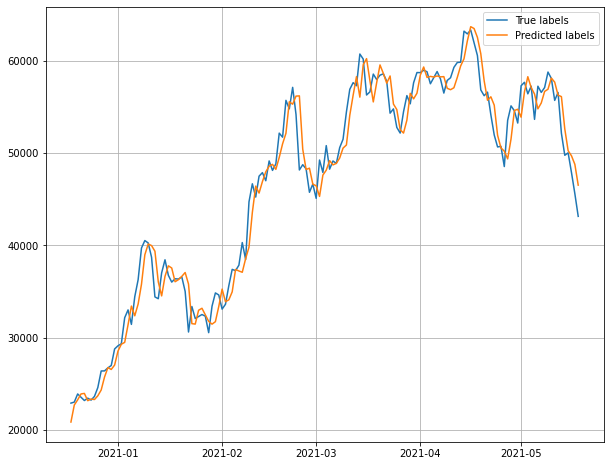

In [51]:
plt.figure(figsize=(10,8))
plot_ts(X_test[-len(test_windows3):],test_labels3,start=400,format='-',labels="True labels")
plot_ts(X_test[-len(test_windows3):],model3_prediction,start=400,format='-',labels="Predicted labels")

In [52]:
#AUTOCORRELATION ????????

#Model 4: Dense - w30 h7

In [53]:
windows4, labels4 = get_windows(prices,30,7)
windows4[:2], labels4[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
         248.25333],
        [198.04883, 198.93233, 200.543  , 210.3075 , 225.02   , 248.25333,
         262.32666]]))

In [54]:
train_windows4, train_labels4,test_windows4, test_labels4 = train_test_split(windows4,labels4,0.2)
train_windows4[0], train_labels4[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]))

In [55]:
model4 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(7)
],name="model4")

#Compile
model4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])
#Fit
model4.fit(x=train_windows4,
           y=train_labels4,
           batch_size=128,
           epochs=100,
           validation_data=(test_windows4,test_labels4),
           callbacks=[checkpoint(model4.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 1967.1261 - mae: 1967.1261 - mse: 15972969.0000 
Epoch 1: val_loss improved from inf to 3714.55908, saving model to experiments/model4


18/18 [==============================] - 1s 38ms/step - loss: 1756.5934 - mae: 1756.5934 - mse: 13576055.0000 - val_loss: 3714.5591 - val_mae: 3714.5591 - val_mse: 37115984.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 696.2278 - mae: 696.2278 - mse: 1781530.1250
Epoch 2: val_loss improved from 3714.55908 to 2171.65894, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 548.6871 - mae: 548.6871 - mse: 1312549.8750 - val_loss: 2171.6589 - val_mae: 2171.6589 - val_mse: 13824112.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 410.1730 - mae: 410.1730 - mse: 626442.0000
Epoch 3: val_loss improved from 2171.65894 to 2167.27148, saving model to experiments/model4


18/18 [==============================] - 0s 27ms/step - loss: 417.0781 - mae: 417.0781 - mse: 827619.3125 - val_loss: 2167.2715 - val_mae: 2167.2715 - val_mse: 13899913.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 483.2916 - mae: 483.2916 - mse: 1068627.0000
Epoch 4: val_loss improved from 2167.27148 to 1812.44678, saving model to experiments/model4


18/18 [==============================] - 0s 27ms/step - loss: 367.8850 - mae: 367.8850 - mse: 669007.4375 - val_loss: 1812.4468 - val_mae: 1812.4468 - val_mse: 10153598.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 398.6641 - mae: 398.6641 - mse: 556063.0625
Epoch 5: val_loss improved from 1812.44678 to 1666.92651, saving model to experiments/model4


18/18 [==============================] - 0s 27ms/step - loss: 344.3382 - mae: 344.3382 - mse: 583325.1250 - val_loss: 1666.9265 - val_mae: 1666.9265 - val_mse: 8824568.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 235.1167 - mae: 235.1167 - mse: 268955.0938
Epoch 6: val_loss did not improve from 1666.92651
18/18 [==============================] - 0s 5ms/step - loss: 318.3913 - mae: 318.3913 - mse: 508379.7500 - val_loss: 1682.0165 - val_mae: 1682.0165 - val_mse: 8920800.0000
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 305.2256 - mae: 305.2256 - mse: 468015.8125
Epoch 7: val_loss improved from 1666.92651 to 1554.19397, saving model to experiments/model4


18/18 [==============================] - 0s 29ms/step - loss: 305.9191 - mae: 305.9191 - mse: 468827.1562 - val_loss: 1554.1940 - val_mae: 1554.1940 - val_mse: 7824376.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 385.4843 - mae: 385.4843 - mse: 719812.7500
Epoch 8: val_loss improved from 1554.19397 to 1511.21643, saving model to experiments/model4


18/18 [==============================] - 0s 27ms/step - loss: 292.9712 - mae: 292.9712 - mse: 433997.0000 - val_loss: 1511.2164 - val_mae: 1511.2164 - val_mse: 7416971.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 256.9504 - mae: 256.9504 - mse: 322767.1875
Epoch 9: val_loss did not improve from 1511.21643
18/18 [==============================] - 0s 5ms/step - loss: 287.1694 - mae: 287.1694 - mse: 418770.6562 - val_loss: 1518.7841 - val_mae: 1518.7841 - val_mse: 7323697.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 299.3303 - mae: 299.3303 - mse: 468185.0938
Epoch 10: val_loss did not improve from 1511.21643
18/18 [==============================] - 0s 5ms/step - loss: 285.1790 - mae: 285.1790 - mse: 407219.9375 - val_loss: 1533.0050 - val_mae: 1533.0050 - val_mse: 7450189.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 207.2244 - mae: 207.2244 - mse: 206067.4375
Epoch 11: val_loss improved from 1511.216

18/18 [==============================] - 0s 28ms/step - loss: 277.2202 - mae: 277.2202 - mse: 386888.6875 - val_loss: 1430.2233 - val_mae: 1430.2233 - val_mse: 6715894.0000
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 276.2911 - mae: 276.2911 - mse: 383732.3750
Epoch 12: val_loss did not improve from 1430.22327
18/18 [==============================] - 0s 6ms/step - loss: 276.2911 - mae: 276.2911 - mse: 383732.3750 - val_loss: 1628.6985 - val_mae: 1628.6985 - val_mse: 8019816.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 265.7678 - mae: 265.7678 - mse: 267899.9688
Epoch 13: val_loss did not improve from 1430.22327
18/18 [==============================] - 0s 5ms/step - loss: 269.0254 - mae: 269.0254 - mse: 363827.8750 - val_loss: 1431.1362 - val_mae: 1431.1362 - val_mse: 6649789.0000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 194.8874 - mae: 194.8874 - mse: 173206.0000
Epoch 14: val_loss improved from 1430.2

18/18 [==============================] - 0s 29ms/step - loss: 261.1333 - mae: 261.1333 - mse: 353627.4688 - val_loss: 1424.6884 - val_mae: 1424.6884 - val_mse: 6639679.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 279.4417 - mae: 279.4417 - mse: 452948.0938
Epoch 15: val_loss did not improve from 1424.68835
18/18 [==============================] - 0s 5ms/step - loss: 259.7094 - mae: 259.7094 - mse: 350484.4688 - val_loss: 1604.3610 - val_mae: 1604.3610 - val_mse: 7643169.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 263.0048 - mae: 263.0048 - mse: 343272.3438
Epoch 16: val_loss improved from 1424.68835 to 1385.21021, saving model to experiments/model4


18/18 [==============================] - 0s 27ms/step - loss: 267.8468 - mae: 267.8468 - mse: 354714.7500 - val_loss: 1385.2102 - val_mae: 1385.2102 - val_mse: 6470289.0000
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 241.5217 - mae: 241.5217 - mse: 277130.5312
Epoch 17: val_loss did not improve from 1385.21021
18/18 [==============================] - 0s 5ms/step - loss: 260.5053 - mae: 260.5053 - mse: 347374.0000 - val_loss: 1507.4252 - val_mae: 1507.4252 - val_mse: 7007863.0000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 200.3775 - mae: 200.3775 - mse: 225105.7500
Epoch 18: val_loss did not improve from 1385.21021
18/18 [==============================] - 0s 5ms/step - loss: 259.3100 - mae: 259.3100 - mse: 339667.8125 - val_loss: 1596.6643 - val_mae: 1596.6643 - val_mse: 7633565.0000
Epoch 19/100
13/18 [====================>.........] - ETA: 0s - loss: 262.2569 - mae: 262.2569 - mse: 337492.1562
Epoch 19: val_loss did not improve from

18/18 [==============================] - 1s 40ms/step - loss: 249.2743 - mae: 249.2743 - mse: 322131.1250 - val_loss: 1365.5490 - val_mae: 1365.5490 - val_mse: 6409917.5000
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 253.4303 - mae: 253.4303 - mse: 325932.9375
Epoch 24: val_loss did not improve from 1365.54895
18/18 [==============================] - 0s 8ms/step - loss: 248.6211 - mae: 248.6211 - mse: 321510.3125 - val_loss: 1532.1284 - val_mae: 1532.1284 - val_mse: 7272891.5000
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 251.8138 - mae: 251.8138 - mse: 337799.2812
Epoch 25: val_loss improved from 1365.54895 to 1359.80200, saving model to experiments/model4


18/18 [==============================] - 1s 54ms/step - loss: 248.1311 - mae: 248.1311 - mse: 321615.8750 - val_loss: 1359.8020 - val_mae: 1359.8020 - val_mse: 6295075.5000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 241.0925 - mae: 241.0925 - mse: 300518.4062
Epoch 26: val_loss did not improve from 1359.80200
18/18 [==============================] - 0s 5ms/step - loss: 244.2816 - mae: 244.2816 - mse: 313045.1250 - val_loss: 1367.9144 - val_mae: 1367.9144 - val_mse: 6285752.5000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 348.9173 - mae: 348.9173 - mse: 720851.6875
Epoch 27: val_loss did not improve from 1359.80200
18/18 [==============================] - 0s 6ms/step - loss: 244.0373 - mae: 244.0373 - mse: 316263.3125 - val_loss: 1425.0082 - val_mae: 1425.0082 - val_mse: 6672487.0000
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 210.6392 - mae: 210.6392 - mse: 208492.6250
Epoch 28: val_loss did not improve from

18/18 [==============================] - 0s 29ms/step - loss: 253.4207 - mae: 253.4207 - mse: 321973.5625 - val_loss: 1356.9242 - val_mae: 1356.9242 - val_mse: 6229038.5000
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 245.0158 - mae: 245.0158 - mse: 313383.5625
Epoch 30: val_loss did not improve from 1356.92419
18/18 [==============================] - 0s 6ms/step - loss: 244.8937 - mae: 244.8937 - mse: 311967.5625 - val_loss: 1384.0088 - val_mae: 1384.0088 - val_mse: 6469111.5000
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 281.6708 - mae: 281.6708 - mse: 348833.7188
Epoch 31: val_loss improved from 1356.92419 to 1355.40906, saving model to experiments/model4


18/18 [==============================] - 0s 28ms/step - loss: 244.8655 - mae: 244.8655 - mse: 307753.5312 - val_loss: 1355.4091 - val_mae: 1355.4091 - val_mse: 6310190.0000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 250.1148 - mae: 250.1148 - mse: 326884.1250
Epoch 32: val_loss improved from 1355.40906 to 1330.79907, saving model to experiments/model4


18/18 [==============================] - 0s 28ms/step - loss: 243.9736 - mae: 243.9736 - mse: 311049.5000 - val_loss: 1330.7991 - val_mae: 1330.7991 - val_mse: 6094183.5000
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 242.5552 - mae: 242.5552 - mse: 309841.8438
Epoch 33: val_loss did not improve from 1330.79907
18/18 [==============================] - 0s 5ms/step - loss: 242.1804 - mae: 242.1804 - mse: 308278.2812 - val_loss: 1347.7346 - val_mae: 1347.7346 - val_mse: 6206854.5000
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 241.6998 - mae: 241.6998 - mse: 306633.5625
Epoch 34: val_loss did not improve from 1330.79907
18/18 [==============================] - 0s 6ms/step - loss: 241.2319 - mae: 241.2319 - mse: 304984.6875 - val_loss: 1401.7062 - val_mae: 1401.7062 - val_mse: 6412834.5000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 175.3716 - mae: 175.3716 - mse: 144637.2656
Epoch 35: val_loss did not improve from

18/18 [==============================] - 0s 27ms/step - loss: 236.3681 - mae: 236.3681 - mse: 298759.7500 - val_loss: 1321.7783 - val_mae: 1321.7783 - val_mse: 6022544.0000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 221.7168 - mae: 221.7168 - mse: 321803.3125
Epoch 38: val_loss did not improve from 1321.77832
18/18 [==============================] - 0s 5ms/step - loss: 237.0346 - mae: 237.0346 - mse: 299067.1250 - val_loss: 1364.9838 - val_mae: 1364.9838 - val_mse: 6252253.0000
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 201.0461 - mae: 201.0461 - mse: 190373.3906
Epoch 39: val_loss did not improve from 1321.77832
18/18 [==============================] - 0s 6ms/step - loss: 236.7105 - mae: 236.7105 - mse: 299298.8125 - val_loss: 1348.4811 - val_mae: 1348.4811 - val_mse: 6198378.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 204.8327 - mae: 204.8327 - mse: 198222.9844
Epoch 40: val_loss did not improve from

18/18 [==============================] - 0s 27ms/step - loss: 235.3767 - mae: 235.3767 - mse: 289891.5312 - val_loss: 1299.0846 - val_mae: 1299.0846 - val_mse: 5802048.5000
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 230.1525 - mae: 230.1525 - mse: 284947.3125
Epoch 55: val_loss did not improve from 1299.08459
18/18 [==============================] - 0s 6ms/step - loss: 231.9010 - mae: 231.9010 - mse: 284718.9688 - val_loss: 1320.3082 - val_mae: 1320.3082 - val_mse: 5937655.0000
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 164.6132 - mae: 164.6132 - mse: 118989.2656
Epoch 56: val_loss did not improve from 1299.08459
18/18 [==============================] - 0s 5ms/step - loss: 231.7542 - mae: 231.7542 - mse: 284153.9688 - val_loss: 1338.4188 - val_mae: 1338.4188 - val_mse: 5953650.0000
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 231.1369 - mae: 231.1369 - mse: 283929.5312
Epoch 57: val_loss improved from 1299.0

18/18 [==============================] - 0s 27ms/step - loss: 231.1369 - mae: 231.1369 - mse: 283929.5312 - val_loss: 1289.4087 - val_mae: 1289.4087 - val_mse: 5792311.5000
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 168.1190 - mae: 168.1190 - mse: 127926.3281
Epoch 58: val_loss did not improve from 1289.40869
18/18 [==============================] - 0s 5ms/step - loss: 236.1079 - mae: 236.1079 - mse: 288916.0000 - val_loss: 1369.6228 - val_mae: 1369.6228 - val_mse: 6091847.0000
Epoch 59/100
15/18 [========================>.....] - ETA: 0s - loss: 238.8574 - mae: 238.8574 - mse: 300287.9375
Epoch 59: val_loss did not improve from 1289.40869
18/18 [==============================] - 0s 7ms/step - loss: 235.3096 - mae: 235.3096 - mse: 286807.8438 - val_loss: 1384.9640 - val_mae: 1384.9640 - val_mse: 6188098.5000
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 217.7530 - mae: 217.7530 - mse: 374741.0000
Epoch 60: val_loss did not improve from

18/18 [==============================] - 0s 28ms/step - loss: 228.0343 - mae: 228.0343 - mse: 280316.0000 - val_loss: 1282.6932 - val_mae: 1282.6932 - val_mse: 5751225.5000
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 238.8777 - mae: 238.8777 - mse: 335711.5625
Epoch 62: val_loss did not improve from 1282.69324
18/18 [==============================] - 0s 5ms/step - loss: 235.8389 - mae: 235.8389 - mse: 291681.7500 - val_loss: 1387.1769 - val_mae: 1387.1769 - val_mse: 6270922.0000
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 231.7300 - mae: 231.7300 - mse: 283000.8750
Epoch 63: val_loss did not improve from 1282.69324
18/18 [==============================] - 0s 6ms/step - loss: 231.7300 - mae: 231.7300 - mse: 283000.8750 - val_loss: 1362.9073 - val_mae: 1362.9073 - val_mse: 6060667.5000
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 221.3239 - mae: 221.3239 - mse: 339752.8438
Epoch 64: val_loss did not improve from

18/18 [==============================] - 1s 30ms/step - loss: 236.5821 - mae: 236.5821 - mse: 293017.0312 - val_loss: 1281.0311 - val_mae: 1281.0311 - val_mse: 5703550.0000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 185.2275 - mae: 185.2275 - mse: 179254.0312
Epoch 68: val_loss did not improve from 1281.03113
18/18 [==============================] - 0s 5ms/step - loss: 232.4995 - mae: 232.4995 - mse: 285341.3750 - val_loss: 1330.0549 - val_mae: 1330.0549 - val_mse: 5896400.5000
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 231.1531 - mae: 231.1531 - mse: 281123.3750
Epoch 69: val_loss did not improve from 1281.03113
18/18 [==============================] - 0s 5ms/step - loss: 231.1531 - mae: 231.1531 - mse: 281123.3750 - val_loss: 1429.0360 - val_mae: 1429.0360 - val_mse: 6374357.5000
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 228.5980 - mae: 228.5980 - mse: 198275.9062
Epoch 70: val_loss did not improve from

18/18 [==============================] - 0s 28ms/step - loss: 225.7861 - mae: 225.7861 - mse: 273607.3438 - val_loss: 1262.8923 - val_mae: 1262.8923 - val_mse: 5604099.5000
Epoch 72/100
16/18 [=========================>....] - ETA: 0s - loss: 245.6202 - mae: 245.6202 - mse: 297061.3750
Epoch 72: val_loss did not improve from 1262.89233
18/18 [==============================] - 0s 6ms/step - loss: 247.4400 - mae: 247.4400 - mse: 299263.1250 - val_loss: 1310.2681 - val_mae: 1310.2681 - val_mse: 5774591.0000
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 269.1855 - mae: 269.1855 - mse: 472760.7500
Epoch 73: val_loss did not improve from 1262.89233
18/18 [==============================] - 0s 5ms/step - loss: 226.3082 - mae: 226.3082 - mse: 271203.5000 - val_loss: 1271.9285 - val_mae: 1271.9285 - val_mse: 5621438.5000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 295.5368 - mae: 295.5368 - mse: 492915.3438
Epoch 74: val_loss did not improve from

18/18 [==============================] - 1s 40ms/step - loss: 226.8886 - mae: 226.8886 - mse: 272543.1562 - val_loss: 1260.4922 - val_mae: 1260.4922 - val_mse: 5610669.5000
Epoch 86/100
16/18 [=========================>....] - ETA: 0s - loss: 224.5198 - mae: 224.5198 - mse: 261543.1562
Epoch 86: val_loss did not improve from 1260.49219
18/18 [==============================] - 0s 9ms/step - loss: 224.1239 - mae: 224.1239 - mse: 267279.7188 - val_loss: 1331.0271 - val_mae: 1331.0271 - val_mse: 5863215.0000
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 235.7876 - mae: 235.7876 - mse: 284480.2188
Epoch 87: val_loss did not improve from 1260.49219
18/18 [==============================] - 0s 8ms/step - loss: 224.3040 - mae: 224.3040 - mse: 270444.3750 - val_loss: 1343.5962 - val_mae: 1343.5962 - val_mse: 5931431.0000
Epoch 88/100
13/18 [====================>.........] - ETA: 0s - loss: 219.2846 - mae: 219.2846 - mse: 260340.0156
Epoch 88: val_loss did not improve from

18/18 [==============================] - 1s 30ms/step - loss: 224.7953 - mae: 224.7953 - mse: 269866.7500 - val_loss: 1259.3523 - val_mae: 1259.3523 - val_mse: 5521956.0000
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 249.9001 - mae: 249.9001 - mse: 299884.6875
Epoch 92: val_loss did not improve from 1259.35229
18/18 [==============================] - 0s 5ms/step - loss: 222.8114 - mae: 222.8114 - mse: 266474.7812 - val_loss: 1283.7406 - val_mae: 1283.7406 - val_mse: 5684443.0000
Epoch 93/100
 1/18 [>.............................] - ETA: 0s - loss: 212.4381 - mae: 212.4381 - mse: 199505.6094
Epoch 93: val_loss did not improve from 1259.35229
18/18 [==============================] - 0s 5ms/step - loss: 221.2548 - mae: 221.2548 - mse: 263987.1250 - val_loss: 1270.4438 - val_mae: 1270.4438 - val_mse: 5579828.0000
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 191.8713 - mae: 191.8713 - mse: 169053.8438
Epoch 94: val_loss did not improve from

In [56]:
model4_best = tf.keras.models.load_model("/content/experiments/model4")
model4_best.evaluate(test_windows4,test_labels4)

18/18 [==============================] - 0s 2ms/step - loss: 1259.3523 - mae: 1259.3523 - mse: 5521956.0000


[1259.352294921875, 1259.352294921875, 5521956.0]

In [57]:
model_4_preds = np.squeeze(model4_best.predict(test_windows4))
model_4_preds[:4] , model_4_preds.shape

18/18 [==============================] - 0s 1ms/step


(array([[9534.347 , 9595.956 , 9426.424 , 9335.334 , 9527.254 , 9532.522 ,
         9509.402 ],
        [9282.795 , 9324.066 , 9054.92  , 9008.055 , 9292.628 , 9331.72  ,
         9374.9375],
        [9094.713 , 9126.857 , 9068.94  , 8815.8955, 9173.793 , 9140.998 ,
         9173.095 ],
        [9196.423 , 9257.807 , 9234.468 , 9024.197 , 9232.235 , 9348.046 ,
         9327.205 ]], dtype=float32), (551, 7))

In [58]:
model_4_results = error_dict(test_labels4, model_4_preds)
model_4_results

{'MAE': 1259.3523128417885,
 'MSE': 5521955.70702634,
 'RMSE': 2349.8841901307264,
 'MASE': 2.240946852378578,
 'MAPE': 5.6146665}

**Visualize**

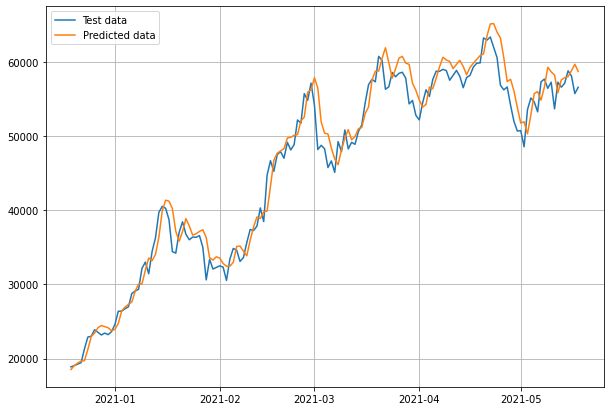

In [59]:
plt.figure(figsize=(10,7))
plot_ts(X_test[-len(test_windows4):],tf.squeeze(test_labels4[:,0]),400,format='-',labels="Test data")
plot_ts(X_test[-len(test_windows4):],model_4_preds[:,0],400,format='-',labels="Predicted data")

In [60]:
model2_results,model_4_results,naive_results,model_3_results

({'MAE': 570.2648479847988,
  'MSE': 1171821.8362782402,
  'RMSE': 1082.5071991807908,
  'MASE': 1.0017972844216159,
  'MAPE': 2.5701246},
 {'MAE': 1259.3523128417885,
  'MSE': 5521955.70702634,
  'RMSE': 2349.8841901307264,
  'MASE': 2.240946852378578,
  'MAPE': 5.6146665},
 {'MAE': 567.9802273457541,
  'MSE': 1147547.1250238959,
  'RMSE': 1071.2362601330744,
  'MASE': 0.9995699939182624,
  'MAPE': 2.516524929982267},
 {'MAE': 619.3364543573293,
  'MSE': 1282981.4464979488,
  'RMSE': 1132.6877091669835,
  'MASE': 1.0826061089471333,
  'MAPE': 2.8614743})

**Compare**

In [61]:
import pandas as pd
Results = pd.DataFrame([naive_results,
              model2_results,
              model_3_results,
              model_4_results
              ],index=["Naive","Model2","Model3","Model4"])
Results

,MAE,MSE,RMSE,MASE,MAPE
Naive,567.980227,1.147547e+06,1071.236260,0.999570,2.516525
Model2,570.264848,1.171822e+06,1082.507199,1.001797,2.570125
Model3,619.336454,1.282981e+06,1132.687709,1.082606,2.861474
Model4,1259.352313,5.521956e+06,2349.884190,2.240947,5.614666


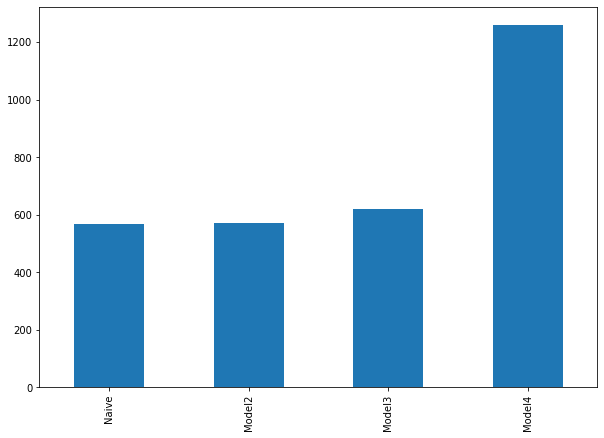

In [62]:
Results["MAE"].plot(figsize=(10,7),kind="bar");

Except from naive model, the best one is model 2, which is window=7, horizon=1

##Model 4 Conv1D
- Windows=7, horizon =1

In [63]:
WINDOW=7
HORIZON=1

preparing for conv - BATCH_SIZE,TIMESTEPS,INPUT_DIM
- Using: train_windows, train_labels,test_windows, test_labels made for model 2

In [66]:
expanding_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [68]:
expanding_layer(train_windows[0]), train_windows[0]

(<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
 array([[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]], dtype=float32)>,
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]))

In [70]:
#Builing model
model_5 = tf.keras.Sequential([
    expanding_layer,
    layers.Conv1D(128,
                  kernel_size=5,
                  padding="causal"),
    layers.Dense(HORIZON)              
],name="model_5")
#Compile
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])
#Fit
model_5.fit(x=train_windows,
            y=train_labels,
            verbose=0,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[checkpoint(model_5.name)])


Epoch 1: val_loss improved from inf to 1323.20190, saving model to experiments/model_5



Epoch 2: val_loss did not improve from 1323.20190

Epoch 3: val_loss improved from 1323.20190 to 1176.41992, saving model to experiments/model_5



Epoch 4: val_loss improved from 1176.41992 to 1170.52490, saving model to experiments/model_5



Epoch 5: val_loss did not improve from 1170.52490

Epoch 6: val_loss improved from 1170.52490 to 1120.83032, saving model to experiments/model_5



Epoch 7: val_loss improved from 1120.83032 to 1012.96515, saving model to experiments/model_5



Epoch 8: val_loss did not improve from 1012.96515

Epoch 9: val_loss improved from 1012.96515 to 908.46075, saving model to experiments/model_5



Epoch 10: val_loss did not improve from 908.46075

Epoch 11: val_loss improved from 908.46075 to 861.50403, saving model to experiments/model_5



Epoch 12: val_loss did not improve from 861.50403

Epoch 13: val_loss improved from 861.50403 to 779.62860, saving model to experiments/model_5



Epoch 14: val_loss improved from 779.62860 to 748.84357, saving model to experiments/model_5



Epoch 15: val_loss did not improve from 748.84357

Epoch 16: val_loss did not improve from 748.84357

Epoch 17: val_loss did not improve from 748.84357

Epoch 18: val_loss improved from 748.84357 to 723.53021, saving model to experiments/model_5



Epoch 19: val_loss improved from 723.53021 to 687.52490, saving model to experiments/model_5



Epoch 20: val_loss improved from 687.52490 to 663.51862, saving model to experiments/model_5



Epoch 21: val_loss did not improve from 663.51862

Epoch 22: val_loss improved from 663.51862 to 644.04858, saving model to experiments/model_5



Epoch 23: val_loss did not improve from 644.04858

Epoch 24: val_loss improved from 644.04858 to 631.90350, saving model to experiments/model_5



Epoch 25: val_loss did not improve from 631.90350

Epoch 26: val_loss did not improve from 631.90350

Epoch 27: val_loss improved from 631.90350 to 617.02478, saving model to experiments/model_5



Epoch 28: val_loss did not improve from 617.02478

Epoch 29: val_loss improved from 617.02478 to 613.23901, saving model to experiments/model_5



Epoch 30: val_loss improved from 613.23901 to 611.59857, saving model to experiments/model_5



Epoch 31: val_loss improved from 611.59857 to 605.88983, saving model to experiments/model_5



Epoch 32: val_loss did not improve from 605.88983

Epoch 33: val_loss improved from 605.88983 to 599.53705, saving model to experiments/model_5



Epoch 34: val_loss did not improve from 599.53705

Epoch 35: val_loss did not improve from 599.53705

Epoch 36: val_loss did not improve from 599.53705

Epoch 37: val_loss improved from 599.53705 to 596.94745, saving model to experiments/model_5



Epoch 38: val_loss did not improve from 596.94745

Epoch 39: val_loss did not improve from 596.94745

Epoch 40: val_loss did not improve from 596.94745

Epoch 41: val_loss did not improve from 596.94745

Epoch 42: val_loss improved from 596.94745 to 585.23688, saving model to experiments/model_5



Epoch 43: val_loss did not improve from 585.23688

Epoch 44: val_loss did not improve from 585.23688

Epoch 45: val_loss improved from 585.23688 to 583.61951, saving model to experiments/model_5



Epoch 46: val_loss did not improve from 583.61951

Epoch 47: val_loss did not improve from 583.61951

Epoch 48: val_loss did not improve from 583.61951

Epoch 49: val_loss did not improve from 583.61951

Epoch 50: val_loss did not improve from 583.61951

Epoch 51: val_loss improved from 583.61951 to 575.60229, saving model to experiments/model_5



Epoch 52: val_loss did not improve from 575.60229

Epoch 53: val_loss did not improve from 575.60229

Epoch 54: val_loss did not improve from 575.60229

Epoch 55: val_loss did not improve from 575.60229

Epoch 56: val_loss did not improve from 575.60229

Epoch 57: val_loss did not improve from 575.60229

Epoch 58: val_loss did not improve from 575.60229

Epoch 59: val_loss improved from 575.60229 to 572.24121, saving model to experiments/model_5



Epoch 60: val_loss did not improve from 572.24121

Epoch 61: val_loss did not improve from 572.24121

Epoch 62: val_loss improved from 572.24121 to 570.65387, saving model to experiments/model_5



Epoch 63: val_loss did not improve from 570.65387

Epoch 64: val_loss did not improve from 570.65387

Epoch 65: val_loss improved from 570.65387 to 568.72772, saving model to experiments/model_5



Epoch 66: val_loss did not improve from 568.72772

Epoch 67: val_loss did not improve from 568.72772

Epoch 68: val_loss did not improve from 568.72772

Epoch 69: val_loss did not improve from 568.72772

Epoch 70: val_loss did not improve from 568.72772

Epoch 71: val_loss did not improve from 568.72772

Epoch 72: val_loss did not improve from 568.72772

Epoch 73: val_loss did not improve from 568.72772

Epoch 74: val_loss did not improve from 568.72772

Epoch 75: val_loss did not improve from 568.72772

Epoch 76: val_loss did not improve from 568.72772

Epoch 77: val_loss did not improve from 568.72772

Epoch 78: val_loss did not improve from 568.72772

Epoch 79: val_loss did not improve from 568.72772

Epoch 80: val_loss did not improve from 568.72772

Epoch 81: val_loss did not improve from 568.72772

Epoch 82: val_loss did not improve from 568.72772

Epoch 83: val_loss did not improve from 568.72772

Epoch 84: val_loss did not improve from 568.72772

Epoch 85: val_loss did not imp


Epoch 88: val_loss did not improve from 566.16473

Epoch 89: val_loss did not improve from 566.16473

Epoch 90: val_loss did not improve from 566.16473

Epoch 91: val_loss did not improve from 566.16473

Epoch 92: val_loss did not improve from 566.16473

Epoch 93: val_loss improved from 566.16473 to 564.74615, saving model to experiments/model_5



Epoch 94: val_loss did not improve from 564.74615

Epoch 95: val_loss did not improve from 564.74615

Epoch 96: val_loss did not improve from 564.74615

Epoch 97: val_loss did not improve from 564.74615

Epoch 98: val_loss did not improve from 564.74615

Epoch 99: val_loss did not improve from 564.74615

Epoch 100: val_loss did not improve from 564.74615


In [71]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [73]:
model5_best = tf.keras.models.load_model("/content/experiments/model_5")
model5_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 564.7463 - mae: 564.7463 - mse: 1157083.2500


[564.7462768554688, 564.7462768554688, 1157083.25]

In [80]:
model_5_preds = np.squeeze(model5_best.predict(test_windows))

18/18 [==============================] - 0s 2ms/step


In [81]:
model_5_preds[:3]

array([8872.394, 8802.714, 9061.644], dtype=float32)

In [83]:
model_5_results = error_dict(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'MAE': 564.746310906832,
 'MSE': 1157083.2637704413,
 'RMSE': 1075.678048381783,
 'MASE': 0.9921027442825497,
 'MAPE': 2.516619}

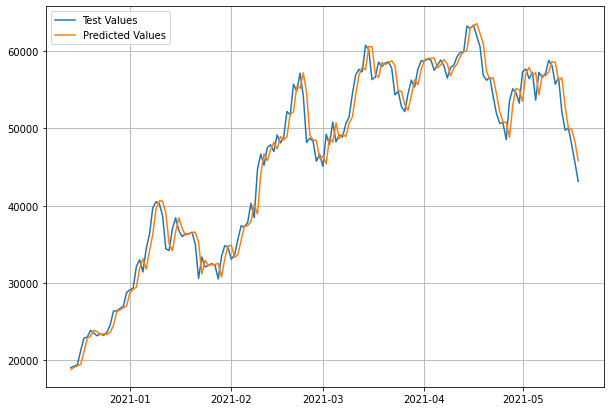

In [85]:
plt.figure(figsize=(10,7))
plot_ts(X_test[-len(test_windows):],test_labels,400,format='-',labels='Test Values')
plot_ts(X_test[-len(test_windows):],model_5_preds,400,format='-',labels='Predicted Values')

##Model 6 - LSTM
- window 7, horizon 1

In [91]:
model6 = tf.keras.Sequential([
    expanding_layer,
    layers.LSTM(128,activation='relu'),
    layers.Dense(HORIZON)
],name="model6")

#Compile
model6.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())
#Fit
model6.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=checkpoint(model6.name))


Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 3109.5503 
Epoch 1: val_loss improved from inf to 12309.53418, saving model to experiments/model6


18/18 [==============================] - 4s 109ms/step - loss: 2742.6567 - val_loss: 12309.5342
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1488.2469
Epoch 2: val_loss improved from 12309.53418 to 3238.05542, saving model to experiments/model6


18/18 [==============================] - 2s 117ms/step - loss: 1245.2418 - val_loss: 3238.0554
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 286.0193
Epoch 3: val_loss improved from 3238.05542 to 1356.65417, saving model to experiments/model6


18/18 [==============================] - 2s 127ms/step - loss: 284.8723 - val_loss: 1356.6542
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 195.4266
Epoch 4: val_loss improved from 1356.65417 to 1123.92371, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 206.2426 - val_loss: 1123.9237
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 192.8862
Epoch 5: val_loss improved from 1123.92371 to 1116.56055, saving model to experiments/model6


18/18 [==============================] - 2s 101ms/step - loss: 188.4739 - val_loss: 1116.5605
Epoch 6/100
 9/18 [==============>...............] - ETA: 0s - loss: 197.8060
Epoch 6: val_loss improved from 1116.56055 to 1029.81653, saving model to experiments/model6


18/18 [==============================] - 2s 99ms/step - loss: 184.2863 - val_loss: 1029.8165
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 176.9334
Epoch 7: val_loss did not improve from 1029.81653
18/18 [==============================] - 0s 7ms/step - loss: 183.8848 - val_loss: 1043.7703
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 182.3139
Epoch 8: val_loss did not improve from 1029.81653
18/18 [==============================] - 0s 8ms/step - loss: 182.3139 - val_loss: 1087.4226
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 175.7347
Epoch 9: val_loss did not improve from 1029.81653
18/18 [==============================] - 0s 8ms/step - loss: 182.9797 - val_loss: 1094.5099
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 188.2309
Epoch 10: val_loss did not improve from 1029.81653
18/18 [==============================] - 0s 8ms/step - loss: 183.0461 - val_loss: 1049.1681
Epoch 11/100
11/18 [=====

18/18 [==============================] - 2s 130ms/step - loss: 179.0116 - val_loss: 1003.4579
Epoch 12/100
11/18 [=================>............] - ETA: 0s - loss: 177.9225
Epoch 12: val_loss did not improve from 1003.45795
18/18 [==============================] - 0s 8ms/step - loss: 177.9703 - val_loss: 1012.5572
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 180.3561
Epoch 13: val_loss improved from 1003.45795 to 986.25641, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 176.6406 - val_loss: 986.2564
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 178.5283
Epoch 14: val_loss did not improve from 986.25641
18/18 [==============================] - 0s 7ms/step - loss: 176.0041 - val_loss: 999.9602
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 176.5858
Epoch 15: val_loss did not improve from 986.25641
18/18 [==============================] - 0s 12ms/step - loss: 174.0374 - val_loss: 1025.2720
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 174.2150
Epoch 16: val_loss improved from 986.25641 to 974.51538, saving model to experiments/model6


18/18 [==============================] - 2s 124ms/step - loss: 172.2382 - val_loss: 974.5154
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 178.5166
Epoch 17: val_loss did not improve from 974.51538
18/18 [==============================] - 0s 7ms/step - loss: 170.9856 - val_loss: 982.8977
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 163.6033
Epoch 18: val_loss improved from 974.51538 to 965.99255, saving model to experiments/model6


18/18 [==============================] - 2s 96ms/step - loss: 170.2510 - val_loss: 965.9926
Epoch 19/100
11/18 [=================>............] - ETA: 0s - loss: 162.9730
Epoch 19: val_loss improved from 965.99255 to 949.34485, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 168.7669 - val_loss: 949.3448
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 167.0109
Epoch 20: val_loss improved from 949.34485 to 948.21899, saving model to experiments/model6


18/18 [==============================] - 2s 126ms/step - loss: 166.9891 - val_loss: 948.2190
Epoch 21/100
 9/18 [==============>...............] - ETA: 0s - loss: 159.3777
Epoch 21: val_loss improved from 948.21899 to 944.77405, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 165.8196 - val_loss: 944.7740
Epoch 22/100
12/18 [===================>..........] - ETA: 0s - loss: 168.7981
Epoch 22: val_loss improved from 944.77405 to 914.88269, saving model to experiments/model6


18/18 [==============================] - 2s 94ms/step - loss: 164.1334 - val_loss: 914.8827
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 158.0025
Epoch 23: val_loss improved from 914.88269 to 909.69232, saving model to experiments/model6


18/18 [==============================] - 2s 126ms/step - loss: 162.2786 - val_loss: 909.6923
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 155.2590
Epoch 24: val_loss improved from 909.69232 to 905.31506, saving model to experiments/model6


18/18 [==============================] - 2s 131ms/step - loss: 161.2133 - val_loss: 905.3151
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 159.1883
Epoch 25: val_loss improved from 905.31506 to 886.04529, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 159.1883 - val_loss: 886.0453
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 166.9670
Epoch 26: val_loss did not improve from 886.04529
18/18 [==============================] - 0s 8ms/step - loss: 158.8094 - val_loss: 918.0137
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 162.5302
Epoch 27: val_loss did not improve from 886.04529
18/18 [==============================] - 0s 8ms/step - loss: 157.0394 - val_loss: 929.4810
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 159.7771
Epoch 28: val_loss did not improve from 886.04529
18/18 [==============================] - 0s 8ms/step - loss: 156.2299 - val_loss: 928.3356
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 161.9155
Epoch 29: val_loss improved from 886.04529 to 883.49945, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 154.4347 - val_loss: 883.4995
Epoch 30/100
11/18 [=================>............] - ETA: 0s - loss: 154.1988
Epoch 30: val_loss improved from 883.49945 to 851.81342, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 151.3652 - val_loss: 851.8134
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 148.7462
Epoch 31: val_loss did not improve from 851.81342
18/18 [==============================] - 0s 7ms/step - loss: 151.7022 - val_loss: 885.9543
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 149.6415
Epoch 32: val_loss improved from 851.81342 to 831.08759, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 149.8673 - val_loss: 831.0876
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 143.5870
Epoch 33: val_loss improved from 831.08759 to 824.71014, saving model to experiments/model6


18/18 [==============================] - 3s 150ms/step - loss: 149.2380 - val_loss: 824.7101
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 154.9518
Epoch 34: val_loss improved from 824.71014 to 820.40857, saving model to experiments/model6


18/18 [==============================] - 2s 100ms/step - loss: 146.7119 - val_loss: 820.4086
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 146.3873
Epoch 35: val_loss improved from 820.40857 to 800.82489, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 144.6176 - val_loss: 800.8249
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 149.1677
Epoch 36: val_loss did not improve from 800.82489
18/18 [==============================] - 0s 7ms/step - loss: 144.6686 - val_loss: 813.4996
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 153.2443
Epoch 37: val_loss improved from 800.82489 to 790.10474, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 142.7534 - val_loss: 790.1047
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 141.5628
Epoch 38: val_loss did not improve from 790.10474
18/18 [==============================] - 0s 8ms/step - loss: 141.0164 - val_loss: 849.8015
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 142.6159
Epoch 39: val_loss improved from 790.10474 to 773.06824, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 141.0480 - val_loss: 773.0682
Epoch 40/100
10/18 [===============>..............] - ETA: 0s - loss: 138.0387
Epoch 40: val_loss did not improve from 773.06824
18/18 [==============================] - 0s 8ms/step - loss: 141.0179 - val_loss: 785.3128
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 136.4836
Epoch 41: val_loss improved from 773.06824 to 770.23956, saving model to experiments/model6


18/18 [==============================] - 2s 132ms/step - loss: 139.2821 - val_loss: 770.2396
Epoch 42/100
13/18 [====================>.........] - ETA: 0s - loss: 142.1908
Epoch 42: val_loss improved from 770.23956 to 755.84412, saving model to experiments/model6


18/18 [==============================] - 2s 119ms/step - loss: 135.9023 - val_loss: 755.8441
Epoch 43/100
 9/18 [==============>...............] - ETA: 0s - loss: 143.0262
Epoch 43: val_loss did not improve from 755.84412
18/18 [==============================] - 0s 8ms/step - loss: 136.5077 - val_loss: 756.2784
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 136.1976
Epoch 44: val_loss did not improve from 755.84412
18/18 [==============================] - 0s 8ms/step - loss: 133.7190 - val_loss: 780.1597
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 128.8451
Epoch 45: val_loss improved from 755.84412 to 736.08856, saving model to experiments/model6


18/18 [==============================] - 2s 94ms/step - loss: 132.6376 - val_loss: 736.0886
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 128.7932
Epoch 46: val_loss did not improve from 736.08856
18/18 [==============================] - 0s 7ms/step - loss: 131.7631 - val_loss: 763.0524
Epoch 47/100
11/18 [=================>............] - ETA: 0s - loss: 130.6700
Epoch 47: val_loss did not improve from 736.08856
18/18 [==============================] - 0s 8ms/step - loss: 133.1253 - val_loss: 743.9527
Epoch 48/100
10/18 [===============>..............] - ETA: 0s - loss: 117.5106
Epoch 48: val_loss did not improve from 736.08856
18/18 [==============================] - 0s 8ms/step - loss: 134.9324 - val_loss: 784.3907
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 127.1154
Epoch 49: val_loss improved from 736.08856 to 731.86847, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 129.9005 - val_loss: 731.8685
Epoch 50/100
11/18 [=================>............] - ETA: 0s - loss: 139.6289
Epoch 50: val_loss improved from 731.86847 to 712.81287, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 129.8484 - val_loss: 712.8129
Epoch 51/100
11/18 [=================>............] - ETA: 0s - loss: 131.5624
Epoch 51: val_loss did not improve from 712.81287
18/18 [==============================] - 0s 8ms/step - loss: 127.2785 - val_loss: 721.5826
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 126.2956
Epoch 52: val_loss improved from 712.81287 to 699.57904, saving model to experiments/model6


18/18 [==============================] - 2s 126ms/step - loss: 126.9911 - val_loss: 699.5790
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 127.5509
Epoch 53: val_loss did not improve from 699.57904
18/18 [==============================] - 0s 7ms/step - loss: 128.3735 - val_loss: 717.7996
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 129.8463
Epoch 54: val_loss improved from 699.57904 to 690.66095, saving model to experiments/model6


18/18 [==============================] - 2s 123ms/step - loss: 129.8463 - val_loss: 690.6609
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 126.7478
Epoch 55: val_loss improved from 690.66095 to 690.59015, saving model to experiments/model6


18/18 [==============================] - 2s 104ms/step - loss: 126.7418 - val_loss: 690.5901
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 127.6947
Epoch 56: val_loss improved from 690.59015 to 683.42285, saving model to experiments/model6


18/18 [==============================] - 2s 99ms/step - loss: 124.6607 - val_loss: 683.4229
Epoch 57/100
12/18 [===================>..........] - ETA: 0s - loss: 126.3133
Epoch 57: val_loss did not improve from 683.42285
18/18 [==============================] - 0s 8ms/step - loss: 124.0842 - val_loss: 712.3011
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 123.5377
Epoch 58: val_loss improved from 683.42285 to 674.80023, saving model to experiments/model6


18/18 [==============================] - 2s 122ms/step - loss: 124.0074 - val_loss: 674.8002
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 122.3447
Epoch 59: val_loss improved from 674.80023 to 670.83008, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 123.0610 - val_loss: 670.8301
Epoch 60/100
10/18 [===============>..............] - ETA: 0s - loss: 127.8666
Epoch 60: val_loss improved from 670.83008 to 665.46033, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 123.4540 - val_loss: 665.4603
Epoch 61/100
12/18 [===================>..........] - ETA: 0s - loss: 134.4387
Epoch 61: val_loss did not improve from 665.46033
18/18 [==============================] - 0s 8ms/step - loss: 130.1865 - val_loss: 684.4277
Epoch 62/100
 9/18 [==============>...............] - ETA: 0s - loss: 125.7625
Epoch 62: val_loss improved from 665.46033 to 660.10327, saving model to experiments/model6


18/18 [==============================] - 2s 112ms/step - loss: 122.9916 - val_loss: 660.1033
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 120.8060
Epoch 63: val_loss improved from 660.10327 to 658.43433, saving model to experiments/model6


18/18 [==============================] - 2s 109ms/step - loss: 120.8060 - val_loss: 658.4343
Epoch 64/100
18/18 [==============================] - ETA: 0s - loss: 120.2078
Epoch 64: val_loss improved from 658.43433 to 657.22772, saving model to experiments/model6


18/18 [==============================] - 2s 123ms/step - loss: 120.2078 - val_loss: 657.2277
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 128.9727
Epoch 65: val_loss improved from 657.22772 to 654.09375, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 122.0061 - val_loss: 654.0938
Epoch 66/100
10/18 [===============>..............] - ETA: 0s - loss: 109.8307
Epoch 66: val_loss improved from 654.09375 to 646.99182, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 118.5072 - val_loss: 646.9918
Epoch 67/100
11/18 [=================>............] - ETA: 0s - loss: 118.9996
Epoch 67: val_loss did not improve from 646.99182
18/18 [==============================] - 0s 9ms/step - loss: 119.0890 - val_loss: 647.5418
Epoch 68/100
11/18 [=================>............] - ETA: 0s - loss: 116.0244
Epoch 68: val_loss did not improve from 646.99182
18/18 [==============================] - 0s 7ms/step - loss: 118.6998 - val_loss: 670.1870
Epoch 69/100
10/18 [===============>..............] - ETA: 0s - loss: 118.7716
Epoch 69: val_loss improved from 646.99182 to 639.86029, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 119.3310 - val_loss: 639.8603
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 121.9607
Epoch 70: val_loss did not improve from 639.86029
18/18 [==============================] - 0s 7ms/step - loss: 118.2288 - val_loss: 648.8190
Epoch 71/100
 9/18 [==============>...............] - ETA: 0s - loss: 115.2743
Epoch 71: val_loss improved from 639.86029 to 639.26886, saving model to experiments/model6


18/18 [==============================] - 2s 104ms/step - loss: 118.5451 - val_loss: 639.2689
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 117.1403
Epoch 72: val_loss improved from 639.26886 to 635.25970, saving model to experiments/model6


18/18 [==============================] - 2s 144ms/step - loss: 117.1403 - val_loss: 635.2597
Epoch 73/100
10/18 [===============>..............] - ETA: 0s - loss: 118.3111
Epoch 73: val_loss improved from 635.25970 to 633.75677, saving model to experiments/model6


18/18 [==============================] - 2s 98ms/step - loss: 117.1460 - val_loss: 633.7568
Epoch 74/100
11/18 [=================>............] - ETA: 0s - loss: 119.5421
Epoch 74: val_loss improved from 633.75677 to 630.17566, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 116.8114 - val_loss: 630.1757
Epoch 75/100
12/18 [===================>..........] - ETA: 0s - loss: 117.3484
Epoch 75: val_loss improved from 630.17566 to 626.84052, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 115.5558 - val_loss: 626.8405
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 121.1630
Epoch 76: val_loss improved from 626.84052 to 626.17365, saving model to experiments/model6


18/18 [==============================] - 2s 122ms/step - loss: 118.5416 - val_loss: 626.1736
Epoch 77/100
12/18 [===================>..........] - ETA: 0s - loss: 114.8743
Epoch 77: val_loss did not improve from 626.17365
18/18 [==============================] - 0s 7ms/step - loss: 117.9920 - val_loss: 693.5231
Epoch 78/100
11/18 [=================>............] - ETA: 0s - loss: 123.0518
Epoch 78: val_loss did not improve from 626.17365
18/18 [==============================] - 0s 8ms/step - loss: 120.2140 - val_loss: 712.3530
Epoch 79/100
11/18 [=================>............] - ETA: 0s - loss: 122.9435
Epoch 79: val_loss did not improve from 626.17365
18/18 [==============================] - 0s 7ms/step - loss: 121.4104 - val_loss: 633.3922
Epoch 80/100
10/18 [===============>..............] - ETA: 0s - loss: 112.9939
Epoch 80: val_loss did not improve from 626.17365
18/18 [==============================] - 0s 8ms/step - loss: 115.8852 - val_loss: 648.3016
Epoch 81/100
10/18 [=======

18/18 [==============================] - 2s 119ms/step - loss: 114.7931 - val_loss: 624.9399
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 114.3748
Epoch 82: val_loss improved from 624.93988 to 615.05817, saving model to experiments/model6


18/18 [==============================] - 2s 103ms/step - loss: 114.3748 - val_loss: 615.0582
Epoch 83/100
11/18 [=================>............] - ETA: 0s - loss: 107.2273
Epoch 83: val_loss did not improve from 615.05817
18/18 [==============================] - 0s 7ms/step - loss: 114.2828 - val_loss: 620.4968
Epoch 84/100
12/18 [===================>..........] - ETA: 0s - loss: 113.0421
Epoch 84: val_loss did not improve from 615.05817
18/18 [==============================] - 0s 7ms/step - loss: 115.5139 - val_loss: 628.6324
Epoch 85/100
11/18 [=================>............] - ETA: 0s - loss: 114.9499
Epoch 85: val_loss did not improve from 615.05817
18/18 [==============================] - 0s 8ms/step - loss: 116.9829 - val_loss: 622.6727
Epoch 86/100
12/18 [===================>..........] - ETA: 0s - loss: 110.4414
Epoch 86: val_loss did not improve from 615.05817
18/18 [==============================] - 0s 7ms/step - loss: 115.1293 - val_loss: 619.5955
Epoch 87/100
11/18 [=======

18/18 [==============================] - 2s 98ms/step - loss: 114.6005 - val_loss: 609.4630
Epoch 88/100
12/18 [===================>..........] - ETA: 0s - loss: 120.7762
Epoch 88: val_loss did not improve from 609.46301
18/18 [==============================] - 0s 8ms/step - loss: 113.1564 - val_loss: 612.4691
Epoch 89/100
12/18 [===================>..........] - ETA: 0s - loss: 111.7316
Epoch 89: val_loss improved from 609.46301 to 609.26385, saving model to experiments/model6


18/18 [==============================] - 2s 94ms/step - loss: 113.0758 - val_loss: 609.2639
Epoch 90/100
11/18 [=================>............] - ETA: 0s - loss: 113.2356
Epoch 90: val_loss improved from 609.26385 to 607.33478, saving model to experiments/model6


18/18 [==============================] - 2s 123ms/step - loss: 112.6299 - val_loss: 607.3348
Epoch 91/100
11/18 [=================>............] - ETA: 0s - loss: 119.6289
Epoch 91: val_loss improved from 607.33478 to 603.47058, saving model to experiments/model6


18/18 [==============================] - 2s 97ms/step - loss: 112.9109 - val_loss: 603.4706
Epoch 92/100
11/18 [=================>............] - ETA: 0s - loss: 114.4489
Epoch 92: val_loss did not improve from 603.47058
18/18 [==============================] - 0s 8ms/step - loss: 114.4094 - val_loss: 638.5309
Epoch 93/100
12/18 [===================>..........] - ETA: 0s - loss: 113.3439
Epoch 93: val_loss improved from 603.47058 to 602.42041, saving model to experiments/model6


18/18 [==============================] - 2s 123ms/step - loss: 113.3693 - val_loss: 602.4204
Epoch 94/100
12/18 [===================>..........] - ETA: 0s - loss: 111.6663
Epoch 94: val_loss did not improve from 602.42041
18/18 [==============================] - 0s 11ms/step - loss: 113.1907 - val_loss: 607.3937
Epoch 95/100
11/18 [=================>............] - ETA: 0s - loss: 119.8657
Epoch 95: val_loss did not improve from 602.42041
18/18 [==============================] - 0s 7ms/step - loss: 114.9066 - val_loss: 613.2978
Epoch 96/100
11/18 [=================>............] - ETA: 0s - loss: 112.8905
Epoch 96: val_loss improved from 602.42041 to 599.07214, saving model to experiments/model6


18/18 [==============================] - 2s 96ms/step - loss: 114.1463 - val_loss: 599.0721
Epoch 97/100
11/18 [=================>............] - ETA: 0s - loss: 123.0261
Epoch 97: val_loss did not improve from 599.07214
18/18 [==============================] - 0s 8ms/step - loss: 115.1947 - val_loss: 609.0562
Epoch 98/100
11/18 [=================>............] - ETA: 0s - loss: 115.0706
Epoch 98: val_loss did not improve from 599.07214
18/18 [==============================] - 0s 8ms/step - loss: 112.0723 - val_loss: 632.5915
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 111.4105
Epoch 99: val_loss did not improve from 599.07214
18/18 [==============================] - 0s 8ms/step - loss: 112.0548 - val_loss: 614.3639
Epoch 100/100
12/18 [===================>..........] - ETA: 0s - loss: 112.1272
Epoch 100: val_loss improved from 599.07214 to 595.71515, saving model to experiments/model6


18/18 [==============================] - 2s 95ms/step - loss: 113.1525 - val_loss: 595.7151


In [92]:
model6_best = tf.keras.models.load_model("/content/experiments/model6")
model6_best.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.7151


595.7151489257812

In [93]:
model6_preds = model6_best.predict(test_windows)
model6_preds[:3]

18/18 [==============================] - 0s 2ms/step


array([[8981.217],
       [8842.413],
       [8988.187]], dtype=float32)

In [96]:
model_6_results = error_dict(np.squeeze(test_labels),
                             np.squeeze(model6_preds))
model_6_results,model_5_results

({'MAE': 595.7151517467883,
  'MSE': 1270727.8673075614,
  'RMSE': 1127.2656595974001,
  'MASE': 1.0465064143751175,
  'MAPE': 2.6805487},
 {'MAE': 564.746310906832,
  'MSE': 1157083.2637704413,
  'RMSE': 1075.678048381783,
  'MASE': 0.9921027442825497,
  'MAPE': 2.516619})